# Twitter Sentiment Analysis using Machine Learning

## Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Corona_Tweets.csv')

In [4]:
dataset.shape

(2090, 7)

<IPython.core.display.Javascript object>


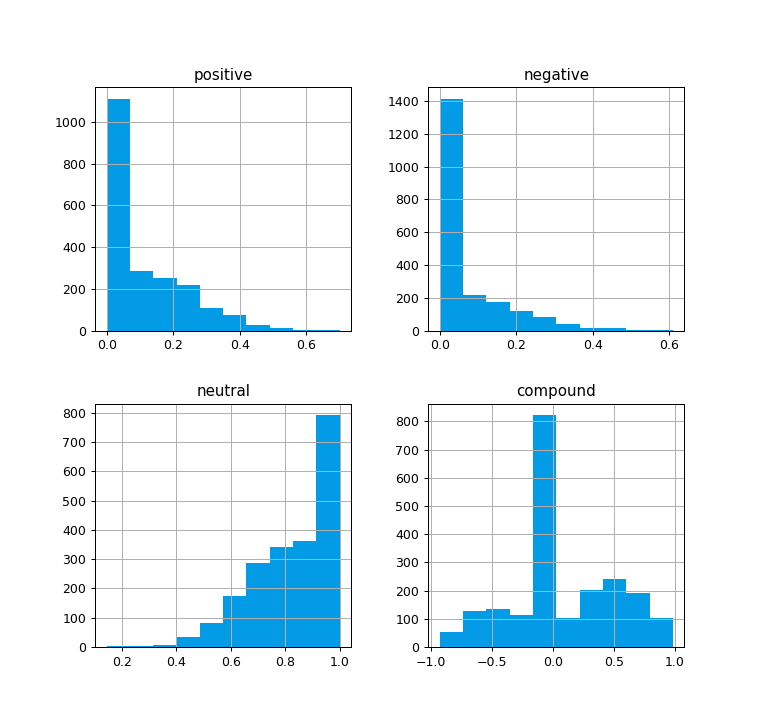

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
dataset.hist(bins=10, ax=ax, color="#039be5")
plt.show()

<IPython.core.display.Javascript object>


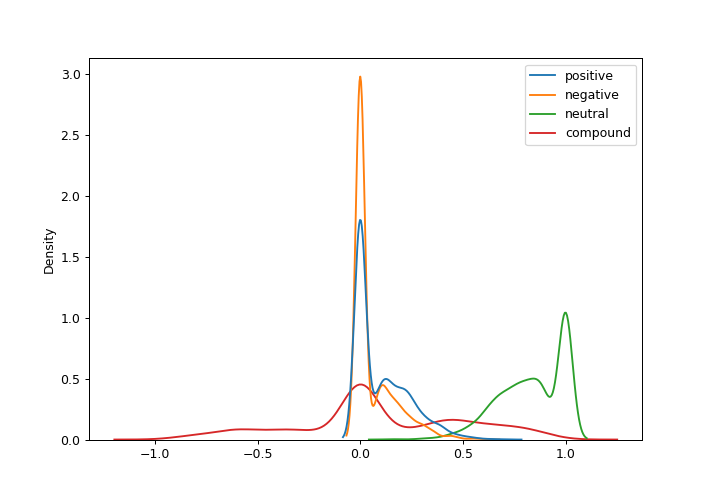

<AxesSubplot:ylabel='Density'>

In [6]:
fig = plt.figure()
sns.kdeplot(data = dataset)

<IPython.core.display.Javascript object>


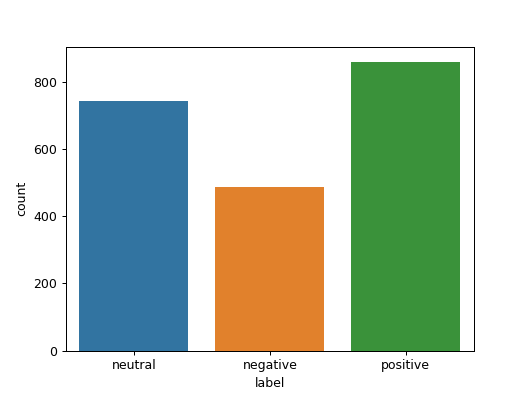

<AxesSubplot:xlabel='label', ylabel='count'>

In [7]:
fig = plt.figure()
sns.countplot(x = 'label', data = dataset)

<IPython.core.display.Javascript object>


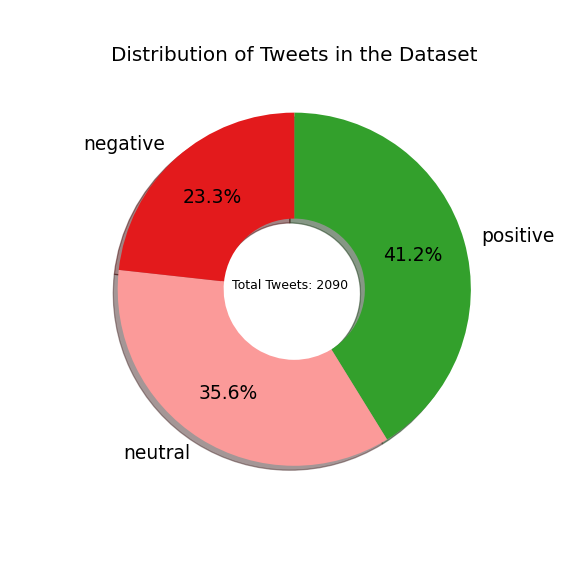

Text(0.5, 1.0, 'Distribution of Tweets in the Dataset')

In [8]:
plt.figure(figsize = (7,7))
sorted_counts = dataset['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(dataset.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16)

In [9]:
dataset['label'][dataset['label'] == 'positive'].count(), dataset['label'][dataset['label'] == 'neutral'].count(), dataset['label'][dataset['label'] == 'negative'].count()

(861, 743, 486)

In [10]:
dataset = dataset[['full_text', 'label']]

In [11]:
dataset

,full_text,label
0,covid19 lungdiseas public health england,neutral
1,journalistdeath far institut percept studi cov...,neutral
2,noida polic arrest lodg fir challan peopl flou...,negative
3,india start bounc back second wave covid19 let...,negative
4,chines student infect covid19 take gaokao isol...,neutral
...,...,...
2085,scienc year limit seat avail first session sta...,neutral
2086,good morn let great taco tuesday tuesdaymorn t...,positive
2087,two covid care centr bed total capac bed set m...,positive
2088,inspir saint ji insan volunt provid corona pre...,positive


In [12]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, -1].values

In [13]:
print(X)

['covid19 lungdiseas public health england'
 'journalistdeath far institut percept studi covid19 savejournalist'
 'noida polic arrest lodg fir challan peopl flout covid19 regul day one unlock'
 ...
 'two covid care centr bed total capac bed set made function region colleg physic educ panisagar north tripura stayhom staysaf'
 'inspir saint ji insan volunt provid corona prevent kit fruit juic coronawarrior differ villag citi state covidwelfarebyvolunt salutetocoronawarrior dsscovidhelp'
 'receiv what app close friend way forward seem medic profess life threaten vocat hazard doctorassault doctorslivematt coronaviruspandem corona corona2ndwav coronawarrior coronavirusupd']


In [14]:
print(y)

['neutral' 'neutral' 'negative' ... 'positive' 'positive' 'positive']


In [15]:
pd.unique(y)

array(['neutral', 'negative', 'positive'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # this will encode in the following manner -> negative: 0, neutral: 1, positive: 2
y = le.fit_transform(y)
print(y)

[1 1 0 ... 2 2 2]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features = 7000)
X = count_vector.fit_transform(X).toarray()

In [18]:
results = {}
final_results = []

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Making the Confusion Matrix & Evaluating Scores

In [20]:
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
def plot_confusion_accuracy():
    results['Training Time'] = end - start
    
    start1 = time()
    y_pred = classifier.predict(X_test)
    end1 = time()
    results['Prediction Time'] = end1 - start1
    
    cm = confusion_matrix(y_test, y_pred)
    
    ConfusionMatrixDisplay(cm, display_labels = classifier.classes_).plot()
    
    results['ML Model'] = classifier.__class__.__name__
    results['Accuracy Score'] = accuracy_score(y_test, y_pred)
    results['Precision Score'] = precision_score(y_test, y_pred, average = 'weighted')
    results['Recall Score'] = recall_score(y_test, y_pred, average = 'weighted')
    results['F1 Score'] = f1_score(y_test, y_pred, average = 'weighted')

    #final_results.append(results.copy())

## Training the Logistic Regression model on the Training set

<IPython.core.display.Javascript object>


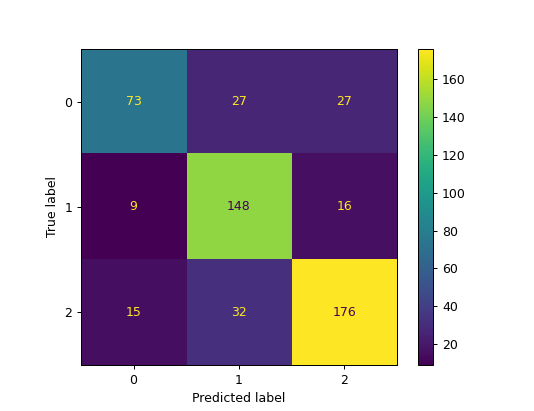

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Logistic Regression

In [22]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())

## Training the SVM model on the Training set

<IPython.core.display.Javascript object>


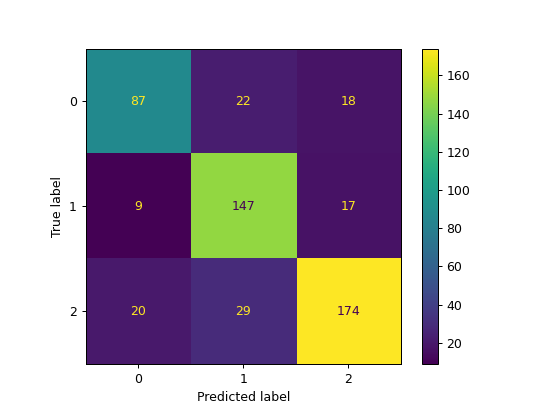

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on SVM

In [24]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies
## Training the Decision Tree Classification model on the Training set
final_results.append(results.copy())

## Training the Decision Tree Classification model on the Training set

<IPython.core.display.Javascript object>


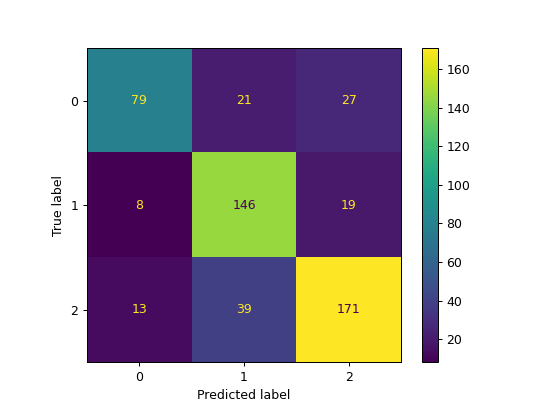

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Decision Tree Classification

In [26]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())## Training the Random Forest Classification model on the Training set

## Training the Random Forest Classification model on the Training set

<IPython.core.display.Javascript object>


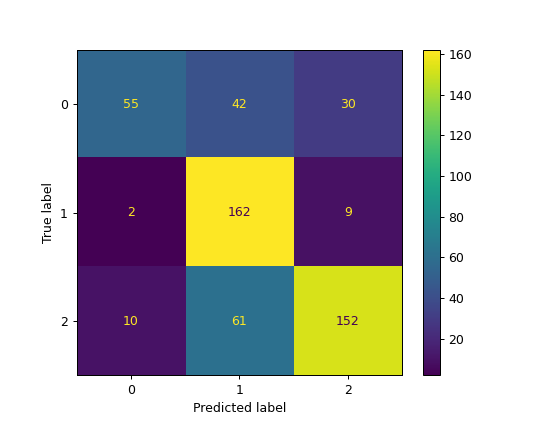

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Random Forest Classification

In [28]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies
## Training the Stochastic Gradient Classification model on the Training set
final_results.append(results.copy())

## Training the Stochastic Gradient Classification model on the Training set

<IPython.core.display.Javascript object>


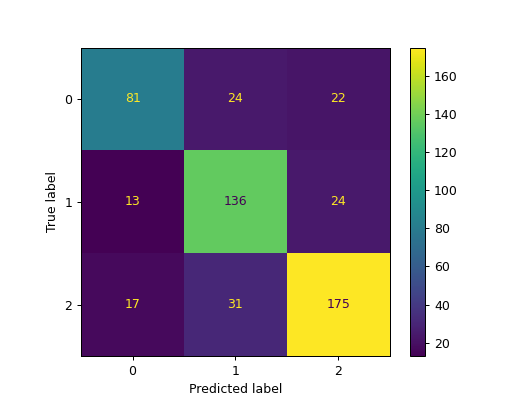

In [29]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Stochastic Gradient Classification

In [30]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())

## Training the XGBoost model on the Training set

[22:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<IPython.core.display.Javascript object>


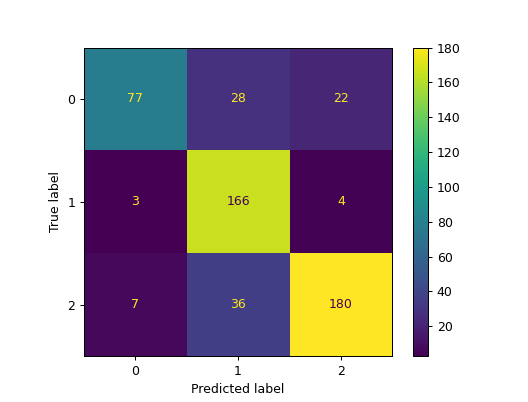

In [31]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
start = time()
classifier.fit(X_train, y_train)## Training the CatBoost model on the Training set
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on XGBoost

In [32]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())

[22:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

## Training the CatBoost model on the Training set

Learning rate set to 0.08096
0:	learn: 1.0817042	total: 212ms	remaining: 3m 31s
1:	learn: 1.0635243	total: 256ms	remaining: 2m 7s
2:	learn: 1.0481417	total: 308ms	remaining: 1m 42s
3:	learn: 1.0384027	total: 353ms	remaining: 1m 27s
4:	learn: 1.0289543	total: 401ms	remaining: 1m 19s
5:	learn: 1.0210926	total: 448ms	remaining: 1m 14s
6:	learn: 1.0123815	total: 494ms	remaining: 1m 10s
7:	learn: 1.0055213	total: 539ms	remaining: 1m 6s
8:	learn: 0.9967728	total: 585ms	remaining: 1m 4s
9:	learn: 0.9900223	total: 630ms	remaining: 1m 2s
10:	learn: 0.9858472	total: 690ms	remaining: 1m 2s
11:	learn: 0.9810547	total: 738ms	remaining: 1m
12:	learn: 0.9752220	total: 784ms	remaining: 59.5s
13:	learn: 0.9708225	total: 836ms	remaining: 58.9s
14:	learn: 0.9677039	total: 883ms	remaining: 58s
15:	learn: 0.9646800	total: 932ms	remaining: 57.3s
16:	learn: 0.9624293	total: 978ms	remaining: 56.6s
17:	learn: 0.9553507	total: 1.02s	remaining: 55.9s
18:	learn: 0.9521930	total: 1.07s	remaining: 55.3s
19:	learn: 

161:	learn: 0.6988478	total: 9.31s	remaining: 48.2s
162:	learn: 0.6976901	total: 9.37s	remaining: 48.1s
163:	learn: 0.6966255	total: 9.44s	remaining: 48.1s
164:	learn: 0.6959904	total: 9.48s	remaining: 48s
165:	learn: 0.6950965	total: 9.53s	remaining: 47.9s
166:	learn: 0.6929273	total: 9.69s	remaining: 48.4s
167:	learn: 0.6918027	total: 9.77s	remaining: 48.4s
168:	learn: 0.6912213	total: 9.82s	remaining: 48.3s
169:	learn: 0.6900808	total: 9.87s	remaining: 48.2s
170:	learn: 0.6889953	total: 9.92s	remaining: 48.1s
171:	learn: 0.6879285	total: 9.97s	remaining: 48s
172:	learn: 0.6870017	total: 10s	remaining: 48s
173:	learn: 0.6862808	total: 10.1s	remaining: 48s
174:	learn: 0.6855622	total: 10.2s	remaining: 48.3s
175:	learn: 0.6848637	total: 10.3s	remaining: 48.3s
176:	learn: 0.6839210	total: 10.4s	remaining: 48.3s
177:	learn: 0.6824471	total: 10.5s	remaining: 48.3s
178:	learn: 0.6812043	total: 10.5s	remaining: 48.3s
179:	learn: 0.6805583	total: 10.6s	remaining: 48.3s
180:	learn: 0.6797267	

321:	learn: 0.5884201	total: 18.5s	remaining: 38.9s
322:	learn: 0.5878997	total: 18.6s	remaining: 38.9s
323:	learn: 0.5874397	total: 18.6s	remaining: 38.8s
324:	learn: 0.5868681	total: 18.7s	remaining: 38.7s
325:	learn: 0.5862259	total: 18.7s	remaining: 38.7s
326:	learn: 0.5858558	total: 18.8s	remaining: 38.7s
327:	learn: 0.5851726	total: 18.8s	remaining: 38.6s
328:	learn: 0.5847513	total: 18.9s	remaining: 38.5s
329:	learn: 0.5842695	total: 18.9s	remaining: 38.5s
330:	learn: 0.5838255	total: 19s	remaining: 38.4s
331:	learn: 0.5833717	total: 19s	remaining: 38.3s
332:	learn: 0.5828473	total: 19.1s	remaining: 38.2s
333:	learn: 0.5823553	total: 19.2s	remaining: 38.2s
334:	learn: 0.5818688	total: 19.2s	remaining: 38.2s
335:	learn: 0.5807465	total: 19.3s	remaining: 38.1s
336:	learn: 0.5803809	total: 19.4s	remaining: 38.1s
337:	learn: 0.5800619	total: 19.5s	remaining: 38.1s
338:	learn: 0.5797377	total: 19.5s	remaining: 38s
339:	learn: 0.5785582	total: 19.6s	remaining: 38s
340:	learn: 0.578052

482:	learn: 0.5216182	total: 27.1s	remaining: 29s
483:	learn: 0.5209463	total: 27.2s	remaining: 29s
484:	learn: 0.5206151	total: 27.2s	remaining: 28.9s
485:	learn: 0.5201668	total: 27.3s	remaining: 28.8s
486:	learn: 0.5196790	total: 27.3s	remaining: 28.8s
487:	learn: 0.5195191	total: 27.4s	remaining: 28.7s
488:	learn: 0.5192210	total: 27.4s	remaining: 28.7s
489:	learn: 0.5189412	total: 27.5s	remaining: 28.6s
490:	learn: 0.5183469	total: 27.5s	remaining: 28.5s
491:	learn: 0.5181655	total: 27.6s	remaining: 28.5s
492:	learn: 0.5179980	total: 27.6s	remaining: 28.4s
493:	learn: 0.5178090	total: 27.7s	remaining: 28.3s
494:	learn: 0.5175136	total: 27.7s	remaining: 28.3s
495:	learn: 0.5170913	total: 27.8s	remaining: 28.2s
496:	learn: 0.5168470	total: 27.8s	remaining: 28.2s
497:	learn: 0.5165849	total: 27.9s	remaining: 28.1s
498:	learn: 0.5163049	total: 27.9s	remaining: 28s
499:	learn: 0.5157936	total: 28s	remaining: 28s
500:	learn: 0.5144955	total: 28s	remaining: 27.9s
501:	learn: 0.5142293	to

641:	learn: 0.4713329	total: 35.8s	remaining: 19.9s
642:	learn: 0.4709836	total: 35.8s	remaining: 19.9s
643:	learn: 0.4707130	total: 35.9s	remaining: 19.8s
644:	learn: 0.4705512	total: 35.9s	remaining: 19.8s
645:	learn: 0.4704470	total: 36s	remaining: 19.7s
646:	learn: 0.4703520	total: 36s	remaining: 19.6s
647:	learn: 0.4701141	total: 36.1s	remaining: 19.6s
648:	learn: 0.4696131	total: 36.1s	remaining: 19.5s
649:	learn: 0.4691961	total: 36.2s	remaining: 19.5s
650:	learn: 0.4690174	total: 36.2s	remaining: 19.4s
651:	learn: 0.4686562	total: 36.3s	remaining: 19.4s
652:	learn: 0.4684376	total: 36.3s	remaining: 19.3s
653:	learn: 0.4681276	total: 36.4s	remaining: 19.2s
654:	learn: 0.4677461	total: 36.4s	remaining: 19.2s
655:	learn: 0.4675948	total: 36.5s	remaining: 19.1s
656:	learn: 0.4672445	total: 36.5s	remaining: 19.1s
657:	learn: 0.4670422	total: 36.6s	remaining: 19s
658:	learn: 0.4669231	total: 36.6s	remaining: 18.9s
659:	learn: 0.4667021	total: 36.6s	remaining: 18.9s
660:	learn: 0.4665

802:	learn: 0.4309895	total: 43.8s	remaining: 10.7s
803:	learn: 0.4307682	total: 43.9s	remaining: 10.7s
804:	learn: 0.4304877	total: 43.9s	remaining: 10.6s
805:	learn: 0.4303399	total: 44s	remaining: 10.6s
806:	learn: 0.4300988	total: 44s	remaining: 10.5s
807:	learn: 0.4297548	total: 44.1s	remaining: 10.5s
808:	learn: 0.4296363	total: 44.1s	remaining: 10.4s
809:	learn: 0.4294388	total: 44.2s	remaining: 10.4s
810:	learn: 0.4293171	total: 44.2s	remaining: 10.3s
811:	learn: 0.4291024	total: 44.3s	remaining: 10.2s
812:	learn: 0.4289335	total: 44.3s	remaining: 10.2s
813:	learn: 0.4285770	total: 44.4s	remaining: 10.1s
814:	learn: 0.4284460	total: 44.4s	remaining: 10.1s
815:	learn: 0.4283196	total: 44.5s	remaining: 10s
816:	learn: 0.4282487	total: 44.5s	remaining: 9.97s
817:	learn: 0.4281540	total: 44.6s	remaining: 9.91s
818:	learn: 0.4280203	total: 44.6s	remaining: 9.86s
819:	learn: 0.4278166	total: 44.7s	remaining: 9.8s
820:	learn: 0.4277065	total: 44.7s	remaining: 9.75s
821:	learn: 0.42745

963:	learn: 0.4006866	total: 52.4s	remaining: 1.96s
964:	learn: 0.4005647	total: 52.4s	remaining: 1.9s
965:	learn: 0.4002929	total: 52.5s	remaining: 1.85s
966:	learn: 0.4001491	total: 52.5s	remaining: 1.79s
967:	learn: 0.4000533	total: 52.6s	remaining: 1.74s
968:	learn: 0.3998998	total: 52.6s	remaining: 1.68s
969:	learn: 0.3997834	total: 52.7s	remaining: 1.63s
970:	learn: 0.3996974	total: 52.7s	remaining: 1.57s
971:	learn: 0.3995008	total: 52.8s	remaining: 1.52s
972:	learn: 0.3994139	total: 52.8s	remaining: 1.47s
973:	learn: 0.3992607	total: 52.9s	remaining: 1.41s
974:	learn: 0.3989777	total: 52.9s	remaining: 1.36s
975:	learn: 0.3988940	total: 53s	remaining: 1.3s
976:	learn: 0.3987451	total: 53s	remaining: 1.25s
977:	learn: 0.3985650	total: 53.1s	remaining: 1.19s
978:	learn: 0.3981748	total: 53.1s	remaining: 1.14s
979:	learn: 0.3978226	total: 53.2s	remaining: 1.08s
980:	learn: 0.3977272	total: 53.2s	remaining: 1.03s
981:	learn: 0.3974529	total: 53.3s	remaining: 976ms
982:	learn: 0.3969

<IPython.core.display.Javascript object>


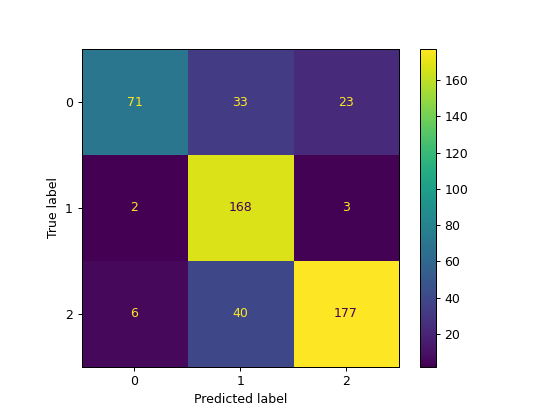

In [33]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on CatBoost

In [34]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())

Learning rate set to 0.080525
0:	learn: 1.0849265	total: 38.9ms	remaining: 38.8s
1:	learn: 1.0708172	total: 82ms	remaining: 40.9s
2:	learn: 1.0554635	total: 123ms	remaining: 41s
3:	learn: 1.0425862	total: 166ms	remaining: 41.3s
4:	learn: 1.0319915	total: 226ms	remaining: 45s
5:	learn: 1.0250694	total: 272ms	remaining: 45.1s
6:	learn: 1.0175911	total: 326ms	remaining: 46.3s
7:	learn: 1.0100654	total: 370ms	remaining: 45.9s
8:	learn: 1.0051791	total: 414ms	remaining: 45.5s
9:	learn: 0.9992554	total: 473ms	remaining: 46.9s
10:	learn: 0.9921516	total: 520ms	remaining: 46.7s
11:	learn: 0.9891117	total: 563ms	remaining: 46.3s
12:	learn: 0.9844144	total: 606ms	remaining: 46s
13:	learn: 0.9791009	total: 648ms	remaining: 45.6s
14:	learn: 0.9741348	total: 696ms	remaining: 45.7s
15:	learn: 0.9701293	total: 751ms	remaining: 46.2s
16:	learn: 0.9653533	total: 796ms	remaining: 46s
17:	learn: 0.9608406	total: 838ms	remaining: 45.7s
18:	learn: 0.9569262	total: 880ms	remaining: 45.4s
19:	learn: 0.953417

164:	learn: 0.7132586	total: 9.65s	remaining: 48.9s
165:	learn: 0.7121240	total: 9.72s	remaining: 48.8s
166:	learn: 0.7112056	total: 9.77s	remaining: 48.7s
167:	learn: 0.7104965	total: 9.83s	remaining: 48.7s
168:	learn: 0.7098020	total: 9.88s	remaining: 48.6s
169:	learn: 0.7082409	total: 9.95s	remaining: 48.6s
170:	learn: 0.7073635	total: 10s	remaining: 48.5s
171:	learn: 0.7069863	total: 10.1s	remaining: 48.4s
172:	learn: 0.7059774	total: 10.1s	remaining: 48.5s
173:	learn: 0.7054333	total: 10.2s	remaining: 48.4s
174:	learn: 0.7042653	total: 10.2s	remaining: 48.2s
175:	learn: 0.7031743	total: 10.3s	remaining: 48.1s
176:	learn: 0.7021490	total: 10.3s	remaining: 48s
177:	learn: 0.7008285	total: 10.4s	remaining: 47.9s
178:	learn: 0.6999771	total: 10.4s	remaining: 47.9s
179:	learn: 0.6986113	total: 10.5s	remaining: 47.8s
180:	learn: 0.6977865	total: 10.6s	remaining: 47.7s
181:	learn: 0.6967190	total: 10.6s	remaining: 47.8s
182:	learn: 0.6949767	total: 10.7s	remaining: 47.8s
183:	learn: 0.69

323:	learn: 0.6008091	total: 17.5s	remaining: 36.4s
324:	learn: 0.6004297	total: 17.5s	remaining: 36.4s
325:	learn: 0.6002027	total: 17.6s	remaining: 36.3s
326:	learn: 0.5996368	total: 17.6s	remaining: 36.2s
327:	learn: 0.5993093	total: 17.6s	remaining: 36.2s
328:	learn: 0.5988678	total: 17.7s	remaining: 36.1s
329:	learn: 0.5985664	total: 17.7s	remaining: 36s
330:	learn: 0.5979817	total: 17.8s	remaining: 36s
331:	learn: 0.5973194	total: 17.8s	remaining: 35.9s
332:	learn: 0.5967617	total: 17.9s	remaining: 35.8s
333:	learn: 0.5961637	total: 17.9s	remaining: 35.7s
334:	learn: 0.5947004	total: 18s	remaining: 35.7s
335:	learn: 0.5942297	total: 18s	remaining: 35.6s
336:	learn: 0.5932176	total: 18.1s	remaining: 35.6s
337:	learn: 0.5921537	total: 18.1s	remaining: 35.5s
338:	learn: 0.5915815	total: 18.2s	remaining: 35.4s
339:	learn: 0.5911790	total: 18.2s	remaining: 35.4s
340:	learn: 0.5907890	total: 18.3s	remaining: 35.3s
341:	learn: 0.5903759	total: 18.3s	remaining: 35.2s
342:	learn: 0.590050

483:	learn: 0.5312199	total: 25.2s	remaining: 26.9s
484:	learn: 0.5308164	total: 25.3s	remaining: 26.9s
485:	learn: 0.5305675	total: 25.3s	remaining: 26.8s
486:	learn: 0.5302574	total: 25.4s	remaining: 26.8s
487:	learn: 0.5299593	total: 25.5s	remaining: 26.7s
488:	learn: 0.5296613	total: 25.5s	remaining: 26.7s
489:	learn: 0.5293151	total: 25.6s	remaining: 26.6s
490:	learn: 0.5288784	total: 25.6s	remaining: 26.6s
491:	learn: 0.5285060	total: 25.7s	remaining: 26.6s
492:	learn: 0.5279129	total: 25.8s	remaining: 26.5s
493:	learn: 0.5277443	total: 25.8s	remaining: 26.4s
494:	learn: 0.5273778	total: 25.9s	remaining: 26.4s
495:	learn: 0.5267033	total: 25.9s	remaining: 26.4s
496:	learn: 0.5259509	total: 26s	remaining: 26.3s
497:	learn: 0.5255500	total: 26.1s	remaining: 26.3s
498:	learn: 0.5252162	total: 26.1s	remaining: 26.2s
499:	learn: 0.5249360	total: 26.2s	remaining: 26.2s
500:	learn: 0.5237980	total: 26.2s	remaining: 26.1s
501:	learn: 0.5232482	total: 26.3s	remaining: 26.1s
502:	learn: 0.

644:	learn: 0.4781757	total: 33.2s	remaining: 18.3s
645:	learn: 0.4780119	total: 33.2s	remaining: 18.2s
646:	learn: 0.4774890	total: 33.3s	remaining: 18.1s
647:	learn: 0.4772626	total: 33.3s	remaining: 18.1s
648:	learn: 0.4770867	total: 33.3s	remaining: 18s
649:	learn: 0.4767348	total: 33.4s	remaining: 18s
650:	learn: 0.4761487	total: 33.4s	remaining: 17.9s
651:	learn: 0.4759385	total: 33.5s	remaining: 17.9s
652:	learn: 0.4757681	total: 33.5s	remaining: 17.8s
653:	learn: 0.4755315	total: 33.6s	remaining: 17.8s
654:	learn: 0.4753446	total: 33.6s	remaining: 17.7s
655:	learn: 0.4752107	total: 33.7s	remaining: 17.7s
656:	learn: 0.4750362	total: 33.7s	remaining: 17.6s
657:	learn: 0.4745761	total: 33.8s	remaining: 17.6s
658:	learn: 0.4743227	total: 33.8s	remaining: 17.5s
659:	learn: 0.4735740	total: 33.9s	remaining: 17.4s
660:	learn: 0.4733158	total: 33.9s	remaining: 17.4s
661:	learn: 0.4730897	total: 34s	remaining: 17.3s
662:	learn: 0.4725915	total: 34s	remaining: 17.3s
663:	learn: 0.472413

803:	learn: 0.4379579	total: 41s	remaining: 9.99s
804:	learn: 0.4375389	total: 41s	remaining: 9.94s
805:	learn: 0.4372131	total: 41.1s	remaining: 9.9s
806:	learn: 0.4370371	total: 41.2s	remaining: 9.86s
807:	learn: 0.4369173	total: 41.3s	remaining: 9.82s
808:	learn: 0.4367216	total: 41.4s	remaining: 9.78s
809:	learn: 0.4365637	total: 41.6s	remaining: 9.75s
810:	learn: 0.4362642	total: 41.6s	remaining: 9.7s
811:	learn: 0.4357759	total: 41.7s	remaining: 9.66s
812:	learn: 0.4355956	total: 41.8s	remaining: 9.61s
813:	learn: 0.4354769	total: 41.9s	remaining: 9.56s
814:	learn: 0.4353694	total: 41.9s	remaining: 9.52s
815:	learn: 0.4349234	total: 42.1s	remaining: 9.48s
816:	learn: 0.4347603	total: 42.1s	remaining: 9.44s
817:	learn: 0.4343579	total: 42.2s	remaining: 9.39s
818:	learn: 0.4342331	total: 42.3s	remaining: 9.34s
819:	learn: 0.4338471	total: 42.4s	remaining: 9.3s
820:	learn: 0.4337040	total: 42.4s	remaining: 9.25s
821:	learn: 0.4334343	total: 42.5s	remaining: 9.2s
822:	learn: 0.433308

963:	learn: 0.4038680	total: 50.7s	remaining: 1.89s
964:	learn: 0.4037185	total: 50.7s	remaining: 1.84s
965:	learn: 0.4035625	total: 50.8s	remaining: 1.79s
966:	learn: 0.4034689	total: 50.8s	remaining: 1.73s
967:	learn: 0.4031286	total: 50.9s	remaining: 1.68s
968:	learn: 0.4029873	total: 50.9s	remaining: 1.63s
969:	learn: 0.4027892	total: 51s	remaining: 1.58s
970:	learn: 0.4025812	total: 51s	remaining: 1.52s
971:	learn: 0.4024742	total: 51.1s	remaining: 1.47s
972:	learn: 0.4023373	total: 51.1s	remaining: 1.42s
973:	learn: 0.4021295	total: 51.2s	remaining: 1.36s
974:	learn: 0.4020118	total: 51.2s	remaining: 1.31s
975:	learn: 0.4018843	total: 51.2s	remaining: 1.26s
976:	learn: 0.4011924	total: 51.3s	remaining: 1.21s
977:	learn: 0.4010343	total: 51.3s	remaining: 1.15s
978:	learn: 0.4008554	total: 51.4s	remaining: 1.1s
979:	learn: 0.4006620	total: 51.4s	remaining: 1.05s
980:	learn: 0.4005574	total: 51.5s	remaining: 997ms
981:	learn: 0.4004492	total: 51.5s	remaining: 945ms
982:	learn: 0.400

127:	learn: 0.7579799	total: 7.85s	remaining: 53.5s
128:	learn: 0.7569955	total: 7.91s	remaining: 53.4s
129:	learn: 0.7559226	total: 7.96s	remaining: 53.2s
130:	learn: 0.7542316	total: 8s	remaining: 53.1s
131:	learn: 0.7532659	total: 8.06s	remaining: 53s
132:	learn: 0.7522041	total: 8.14s	remaining: 53s
133:	learn: 0.7511586	total: 8.19s	remaining: 53s
134:	learn: 0.7499779	total: 8.24s	remaining: 52.8s
135:	learn: 0.7490820	total: 8.29s	remaining: 52.7s
136:	learn: 0.7476497	total: 8.35s	remaining: 52.6s
137:	learn: 0.7466174	total: 8.4s	remaining: 52.5s
138:	learn: 0.7444083	total: 8.46s	remaining: 52.4s
139:	learn: 0.7429638	total: 8.52s	remaining: 52.4s
140:	learn: 0.7422385	total: 8.59s	remaining: 52.3s
141:	learn: 0.7415948	total: 8.63s	remaining: 52.1s
142:	learn: 0.7402306	total: 8.68s	remaining: 52s
143:	learn: 0.7393305	total: 8.73s	remaining: 51.9s
144:	learn: 0.7381759	total: 8.79s	remaining: 51.8s
145:	learn: 0.7368868	total: 8.84s	remaining: 51.7s
146:	learn: 0.7355238	to

290:	learn: 0.6141479	total: 16.4s	remaining: 39.9s
291:	learn: 0.6127854	total: 16.4s	remaining: 39.8s
292:	learn: 0.6120148	total: 16.5s	remaining: 39.7s
293:	learn: 0.6117112	total: 16.5s	remaining: 39.7s
294:	learn: 0.6108471	total: 16.6s	remaining: 39.6s
295:	learn: 0.6102378	total: 16.6s	remaining: 39.5s
296:	learn: 0.6095325	total: 16.7s	remaining: 39.5s
297:	learn: 0.6091325	total: 16.7s	remaining: 39.4s
298:	learn: 0.6086386	total: 16.8s	remaining: 39.3s
299:	learn: 0.6081811	total: 16.8s	remaining: 39.2s
300:	learn: 0.6078862	total: 16.9s	remaining: 39.2s
301:	learn: 0.6075389	total: 16.9s	remaining: 39.1s
302:	learn: 0.6063313	total: 17s	remaining: 39s
303:	learn: 0.6052206	total: 17s	remaining: 38.9s
304:	learn: 0.6046760	total: 17.1s	remaining: 38.9s
305:	learn: 0.6042705	total: 17.1s	remaining: 38.8s
306:	learn: 0.6036078	total: 17.2s	remaining: 38.7s
307:	learn: 0.6025006	total: 17.2s	remaining: 38.6s
308:	learn: 0.6018695	total: 17.2s	remaining: 38.6s
309:	learn: 0.6015

453:	learn: 0.5332961	total: 24.3s	remaining: 29.2s
454:	learn: 0.5330402	total: 24.3s	remaining: 29.1s
455:	learn: 0.5325883	total: 24.4s	remaining: 29.1s
456:	learn: 0.5321432	total: 24.4s	remaining: 29s
457:	learn: 0.5319450	total: 24.4s	remaining: 28.9s
458:	learn: 0.5316921	total: 24.5s	remaining: 28.9s
459:	learn: 0.5314687	total: 24.6s	remaining: 28.8s
460:	learn: 0.5312622	total: 24.6s	remaining: 28.8s
461:	learn: 0.5306981	total: 24.6s	remaining: 28.7s
462:	learn: 0.5301281	total: 24.7s	remaining: 28.6s
463:	learn: 0.5296358	total: 24.7s	remaining: 28.6s
464:	learn: 0.5290899	total: 24.8s	remaining: 28.5s
465:	learn: 0.5288234	total: 24.8s	remaining: 28.5s
466:	learn: 0.5284185	total: 24.9s	remaining: 28.4s
467:	learn: 0.5279772	total: 24.9s	remaining: 28.3s
468:	learn: 0.5276078	total: 25s	remaining: 28.3s
469:	learn: 0.5273522	total: 25s	remaining: 28.2s
470:	learn: 0.5269736	total: 25.1s	remaining: 28.2s
471:	learn: 0.5264134	total: 25.1s	remaining: 28.1s
472:	learn: 0.5260

614:	learn: 0.4811433	total: 32.5s	remaining: 20.4s
615:	learn: 0.4808986	total: 32.6s	remaining: 20.3s
616:	learn: 0.4806215	total: 32.6s	remaining: 20.3s
617:	learn: 0.4803301	total: 32.7s	remaining: 20.2s
618:	learn: 0.4798385	total: 32.7s	remaining: 20.1s
619:	learn: 0.4794448	total: 32.8s	remaining: 20.1s
620:	learn: 0.4790350	total: 32.8s	remaining: 20s
621:	learn: 0.4788794	total: 32.9s	remaining: 20s
622:	learn: 0.4780622	total: 32.9s	remaining: 19.9s
623:	learn: 0.4771379	total: 33s	remaining: 19.9s
624:	learn: 0.4769380	total: 33s	remaining: 19.8s
625:	learn: 0.4766320	total: 33.1s	remaining: 19.8s
626:	learn: 0.4762604	total: 33.1s	remaining: 19.7s
627:	learn: 0.4758958	total: 33.2s	remaining: 19.6s
628:	learn: 0.4755415	total: 33.2s	remaining: 19.6s
629:	learn: 0.4754013	total: 33.3s	remaining: 19.5s
630:	learn: 0.4751535	total: 33.3s	remaining: 19.5s
631:	learn: 0.4749630	total: 33.4s	remaining: 19.4s
632:	learn: 0.4747278	total: 33.4s	remaining: 19.4s
633:	learn: 0.474548

774:	learn: 0.4400895	total: 40.4s	remaining: 11.7s
775:	learn: 0.4396361	total: 40.4s	remaining: 11.7s
776:	learn: 0.4393884	total: 40.5s	remaining: 11.6s
777:	learn: 0.4388486	total: 40.5s	remaining: 11.6s
778:	learn: 0.4385887	total: 40.6s	remaining: 11.5s
779:	learn: 0.4382798	total: 40.7s	remaining: 11.5s
780:	learn: 0.4378983	total: 40.7s	remaining: 11.4s
781:	learn: 0.4375507	total: 40.8s	remaining: 11.4s
782:	learn: 0.4372959	total: 40.8s	remaining: 11.3s
783:	learn: 0.4369454	total: 40.9s	remaining: 11.3s
784:	learn: 0.4368123	total: 40.9s	remaining: 11.2s
785:	learn: 0.4365341	total: 41s	remaining: 11.2s
786:	learn: 0.4363767	total: 41s	remaining: 11.1s
787:	learn: 0.4361642	total: 41.1s	remaining: 11s
788:	learn: 0.4351190	total: 41.1s	remaining: 11s
789:	learn: 0.4348587	total: 41.2s	remaining: 10.9s
790:	learn: 0.4346896	total: 41.2s	remaining: 10.9s
791:	learn: 0.4345723	total: 41.3s	remaining: 10.8s
792:	learn: 0.4343758	total: 41.3s	remaining: 10.8s
793:	learn: 0.434072

934:	learn: 0.4030388	total: 48.9s	remaining: 3.4s
935:	learn: 0.4027976	total: 49s	remaining: 3.35s
936:	learn: 0.4026784	total: 49s	remaining: 3.29s
937:	learn: 0.4025059	total: 49s	remaining: 3.24s
938:	learn: 0.4022817	total: 49.1s	remaining: 3.19s
939:	learn: 0.4021677	total: 49.1s	remaining: 3.14s
940:	learn: 0.4020645	total: 49.2s	remaining: 3.08s
941:	learn: 0.4017258	total: 49.2s	remaining: 3.03s
942:	learn: 0.4016184	total: 49.3s	remaining: 2.98s
943:	learn: 0.4014861	total: 49.3s	remaining: 2.92s
944:	learn: 0.4013831	total: 49.4s	remaining: 2.87s
945:	learn: 0.4011136	total: 49.4s	remaining: 2.82s
946:	learn: 0.4009239	total: 49.5s	remaining: 2.77s
947:	learn: 0.4007179	total: 49.5s	remaining: 2.72s
948:	learn: 0.4005658	total: 49.6s	remaining: 2.66s
949:	learn: 0.4003666	total: 49.6s	remaining: 2.61s
950:	learn: 0.4001585	total: 49.7s	remaining: 2.56s
951:	learn: 0.3998267	total: 49.7s	remaining: 2.51s
952:	learn: 0.3996998	total: 49.8s	remaining: 2.45s
953:	learn: 0.39935

98:	learn: 0.7950388	total: 4.89s	remaining: 44.5s
99:	learn: 0.7937917	total: 4.95s	remaining: 44.5s
100:	learn: 0.7919750	total: 5s	remaining: 44.5s
101:	learn: 0.7903780	total: 5.06s	remaining: 44.5s
102:	learn: 0.7889601	total: 5.11s	remaining: 44.5s
103:	learn: 0.7868059	total: 5.18s	remaining: 44.6s
104:	learn: 0.7839725	total: 5.24s	remaining: 44.6s
105:	learn: 0.7813333	total: 5.29s	remaining: 44.6s
106:	learn: 0.7802133	total: 5.36s	remaining: 44.7s
107:	learn: 0.7790053	total: 5.42s	remaining: 44.7s
108:	learn: 0.7779491	total: 5.47s	remaining: 44.7s
109:	learn: 0.7768832	total: 5.53s	remaining: 44.7s
110:	learn: 0.7748751	total: 5.59s	remaining: 44.8s
111:	learn: 0.7736891	total: 5.65s	remaining: 44.8s
112:	learn: 0.7721367	total: 5.71s	remaining: 44.8s
113:	learn: 0.7708456	total: 5.76s	remaining: 44.7s
114:	learn: 0.7692293	total: 5.81s	remaining: 44.7s
115:	learn: 0.7665574	total: 5.87s	remaining: 44.7s
116:	learn: 0.7649122	total: 5.91s	remaining: 44.6s
117:	learn: 0.763

257:	learn: 0.6280174	total: 12.7s	remaining: 36.5s
258:	learn: 0.6268880	total: 12.7s	remaining: 36.4s
259:	learn: 0.6265381	total: 12.8s	remaining: 36.4s
260:	learn: 0.6260367	total: 12.8s	remaining: 36.3s
261:	learn: 0.6254773	total: 12.9s	remaining: 36.2s
262:	learn: 0.6249308	total: 12.9s	remaining: 36.2s
263:	learn: 0.6244649	total: 13s	remaining: 36.2s
264:	learn: 0.6239645	total: 13s	remaining: 36.1s
265:	learn: 0.6232947	total: 13.1s	remaining: 36s
266:	learn: 0.6227542	total: 13.1s	remaining: 36s
267:	learn: 0.6223580	total: 13.2s	remaining: 35.9s
268:	learn: 0.6220727	total: 13.2s	remaining: 35.9s
269:	learn: 0.6216205	total: 13.3s	remaining: 35.8s
270:	learn: 0.6213612	total: 13.3s	remaining: 35.8s
271:	learn: 0.6208133	total: 13.3s	remaining: 35.7s
272:	learn: 0.6205106	total: 13.4s	remaining: 35.7s
273:	learn: 0.6197773	total: 13.4s	remaining: 35.6s
274:	learn: 0.6190216	total: 13.5s	remaining: 35.6s
275:	learn: 0.6184113	total: 13.5s	remaining: 35.5s
276:	learn: 0.618051

418:	learn: 0.5468643	total: 20.4s	remaining: 28.3s
419:	learn: 0.5465752	total: 20.5s	remaining: 28.3s
420:	learn: 0.5462547	total: 20.5s	remaining: 28.3s
421:	learn: 0.5458690	total: 20.6s	remaining: 28.2s
422:	learn: 0.5454209	total: 20.7s	remaining: 28.2s
423:	learn: 0.5449823	total: 20.7s	remaining: 28.2s
424:	learn: 0.5442900	total: 20.8s	remaining: 28.1s
425:	learn: 0.5440071	total: 20.8s	remaining: 28.1s
426:	learn: 0.5437013	total: 20.9s	remaining: 28s
427:	learn: 0.5431330	total: 21s	remaining: 28s
428:	learn: 0.5427295	total: 21s	remaining: 28s
429:	learn: 0.5424685	total: 21.1s	remaining: 27.9s
430:	learn: 0.5419814	total: 21.1s	remaining: 27.9s
431:	learn: 0.5417183	total: 21.2s	remaining: 27.9s
432:	learn: 0.5413278	total: 21.3s	remaining: 27.8s
433:	learn: 0.5410365	total: 21.3s	remaining: 27.8s
434:	learn: 0.5407104	total: 21.4s	remaining: 27.8s
435:	learn: 0.5401078	total: 21.4s	remaining: 27.7s
436:	learn: 0.5398996	total: 21.5s	remaining: 27.7s
437:	learn: 0.5395556	

580:	learn: 0.4880675	total: 28.4s	remaining: 20.5s
581:	learn: 0.4874436	total: 28.4s	remaining: 20.4s
582:	learn: 0.4872188	total: 28.5s	remaining: 20.4s
583:	learn: 0.4867733	total: 28.5s	remaining: 20.3s
584:	learn: 0.4866171	total: 28.6s	remaining: 20.3s
585:	learn: 0.4860227	total: 28.6s	remaining: 20.2s
586:	learn: 0.4857078	total: 28.7s	remaining: 20.2s
587:	learn: 0.4853783	total: 28.7s	remaining: 20.1s
588:	learn: 0.4851885	total: 28.8s	remaining: 20.1s
589:	learn: 0.4849367	total: 28.8s	remaining: 20s
590:	learn: 0.4847210	total: 28.9s	remaining: 20s
591:	learn: 0.4845352	total: 28.9s	remaining: 19.9s
592:	learn: 0.4841119	total: 28.9s	remaining: 19.9s
593:	learn: 0.4839354	total: 29s	remaining: 19.8s
594:	learn: 0.4837500	total: 29s	remaining: 19.8s
595:	learn: 0.4831728	total: 29.1s	remaining: 19.7s
596:	learn: 0.4830340	total: 29.1s	remaining: 19.7s
597:	learn: 0.4827018	total: 29.2s	remaining: 19.6s
598:	learn: 0.4824849	total: 29.2s	remaining: 19.6s
599:	learn: 0.482165

741:	learn: 0.4464140	total: 36s	remaining: 12.5s
742:	learn: 0.4460610	total: 36.1s	remaining: 12.5s
743:	learn: 0.4459018	total: 36.1s	remaining: 12.4s
744:	learn: 0.4456945	total: 36.2s	remaining: 12.4s
745:	learn: 0.4455006	total: 36.2s	remaining: 12.3s
746:	learn: 0.4452929	total: 36.3s	remaining: 12.3s
747:	learn: 0.4450244	total: 36.4s	remaining: 12.2s
748:	learn: 0.4448991	total: 36.4s	remaining: 12.2s
749:	learn: 0.4447409	total: 36.5s	remaining: 12.2s
750:	learn: 0.4445419	total: 36.5s	remaining: 12.1s
751:	learn: 0.4443957	total: 36.6s	remaining: 12.1s
752:	learn: 0.4442058	total: 36.7s	remaining: 12s
753:	learn: 0.4438589	total: 36.7s	remaining: 12s
754:	learn: 0.4434096	total: 36.8s	remaining: 11.9s
755:	learn: 0.4431857	total: 36.8s	remaining: 11.9s
756:	learn: 0.4430568	total: 36.9s	remaining: 11.8s
757:	learn: 0.4427657	total: 37s	remaining: 11.8s
758:	learn: 0.4425305	total: 37s	remaining: 11.8s
759:	learn: 0.4423658	total: 37.1s	remaining: 11.7s
760:	learn: 0.4421025	

901:	learn: 0.4109000	total: 43.9s	remaining: 4.77s
902:	learn: 0.4107449	total: 44s	remaining: 4.73s
903:	learn: 0.4105473	total: 44s	remaining: 4.68s
904:	learn: 0.4103724	total: 44.1s	remaining: 4.63s
905:	learn: 0.4100096	total: 44.1s	remaining: 4.58s
906:	learn: 0.4096597	total: 44.2s	remaining: 4.53s
907:	learn: 0.4095421	total: 44.3s	remaining: 4.48s
908:	learn: 0.4092702	total: 44.3s	remaining: 4.43s
909:	learn: 0.4090767	total: 44.3s	remaining: 4.38s
910:	learn: 0.4088298	total: 44.4s	remaining: 4.34s
911:	learn: 0.4087588	total: 44.4s	remaining: 4.29s
912:	learn: 0.4085693	total: 44.5s	remaining: 4.24s
913:	learn: 0.4083827	total: 44.5s	remaining: 4.19s
914:	learn: 0.4082239	total: 44.6s	remaining: 4.14s
915:	learn: 0.4081372	total: 44.6s	remaining: 4.09s
916:	learn: 0.4079828	total: 44.7s	remaining: 4.04s
917:	learn: 0.4078479	total: 44.7s	remaining: 3.99s
918:	learn: 0.4077073	total: 44.7s	remaining: 3.94s
919:	learn: 0.4074420	total: 44.8s	remaining: 3.9s
920:	learn: 0.407

62:	learn: 0.8623339	total: 3.09s	remaining: 46s
63:	learn: 0.8607600	total: 3.14s	remaining: 46s
64:	learn: 0.8589896	total: 3.19s	remaining: 45.9s
65:	learn: 0.8581889	total: 3.23s	remaining: 45.8s
66:	learn: 0.8577054	total: 3.27s	remaining: 45.6s
67:	learn: 0.8562016	total: 3.33s	remaining: 45.7s
68:	learn: 0.8550462	total: 3.38s	remaining: 45.5s
69:	learn: 0.8538941	total: 3.43s	remaining: 45.5s
70:	learn: 0.8533880	total: 3.47s	remaining: 45.4s
71:	learn: 0.8510909	total: 3.51s	remaining: 45.3s
72:	learn: 0.8493602	total: 3.57s	remaining: 45.3s
73:	learn: 0.8486048	total: 3.62s	remaining: 45.3s
74:	learn: 0.8473120	total: 3.66s	remaining: 45.2s
75:	learn: 0.8456688	total: 3.71s	remaining: 45.1s
76:	learn: 0.8439180	total: 3.75s	remaining: 44.9s
77:	learn: 0.8421664	total: 3.8s	remaining: 44.9s
78:	learn: 0.8398184	total: 3.85s	remaining: 44.9s
79:	learn: 0.8377796	total: 3.9s	remaining: 44.8s
80:	learn: 0.8364470	total: 3.94s	remaining: 44.7s
81:	learn: 0.8354004	total: 3.98s	rem

224:	learn: 0.6536185	total: 10.8s	remaining: 37.2s
225:	learn: 0.6528961	total: 10.8s	remaining: 37.1s
226:	learn: 0.6523688	total: 10.9s	remaining: 37.1s
227:	learn: 0.6518227	total: 10.9s	remaining: 37s
228:	learn: 0.6513877	total: 11s	remaining: 36.9s
229:	learn: 0.6505716	total: 11s	remaining: 36.9s
230:	learn: 0.6495475	total: 11.1s	remaining: 36.9s
231:	learn: 0.6484592	total: 11.1s	remaining: 36.8s
232:	learn: 0.6476045	total: 11.2s	remaining: 36.8s
233:	learn: 0.6468404	total: 11.2s	remaining: 36.7s
234:	learn: 0.6458161	total: 11.3s	remaining: 36.7s
235:	learn: 0.6452742	total: 11.3s	remaining: 36.6s
236:	learn: 0.6442131	total: 11.4s	remaining: 36.6s
237:	learn: 0.6437741	total: 11.4s	remaining: 36.5s
238:	learn: 0.6428651	total: 11.4s	remaining: 36.5s
239:	learn: 0.6421269	total: 11.5s	remaining: 36.4s
240:	learn: 0.6413804	total: 11.5s	remaining: 36.4s
241:	learn: 0.6405433	total: 11.6s	remaining: 36.3s
242:	learn: 0.6397518	total: 11.6s	remaining: 36.2s
243:	learn: 0.6394

383:	learn: 0.5617469	total: 18.7s	remaining: 30s
384:	learn: 0.5616060	total: 18.8s	remaining: 30s
385:	learn: 0.5612448	total: 18.8s	remaining: 29.9s
386:	learn: 0.5606944	total: 18.9s	remaining: 29.9s
387:	learn: 0.5602895	total: 18.9s	remaining: 29.8s
388:	learn: 0.5597263	total: 19s	remaining: 29.8s
389:	learn: 0.5595434	total: 19s	remaining: 29.8s
390:	learn: 0.5591816	total: 19.1s	remaining: 29.7s
391:	learn: 0.5589341	total: 19.1s	remaining: 29.6s
392:	learn: 0.5585429	total: 19.2s	remaining: 29.6s
393:	learn: 0.5577425	total: 19.2s	remaining: 29.5s
394:	learn: 0.5573253	total: 19.3s	remaining: 29.5s
395:	learn: 0.5570308	total: 19.3s	remaining: 29.4s
396:	learn: 0.5567500	total: 19.4s	remaining: 29.4s
397:	learn: 0.5555358	total: 19.4s	remaining: 29.3s
398:	learn: 0.5552660	total: 19.5s	remaining: 29.3s
399:	learn: 0.5549737	total: 19.5s	remaining: 29.2s
400:	learn: 0.5547875	total: 19.5s	remaining: 29.2s
401:	learn: 0.5541440	total: 19.6s	remaining: 29.1s
402:	learn: 0.553814

546:	learn: 0.5010412	total: 26.4s	remaining: 21.8s
547:	learn: 0.5008376	total: 26.4s	remaining: 21.8s
548:	learn: 0.5006049	total: 26.5s	remaining: 21.8s
549:	learn: 0.5002892	total: 26.5s	remaining: 21.7s
550:	learn: 0.5000229	total: 26.6s	remaining: 21.7s
551:	learn: 0.4998150	total: 26.6s	remaining: 21.6s
552:	learn: 0.4996194	total: 26.7s	remaining: 21.6s
553:	learn: 0.4989805	total: 26.7s	remaining: 21.5s
554:	learn: 0.4987394	total: 26.8s	remaining: 21.5s
555:	learn: 0.4984357	total: 26.8s	remaining: 21.4s
556:	learn: 0.4981784	total: 26.9s	remaining: 21.4s
557:	learn: 0.4979382	total: 26.9s	remaining: 21.3s
558:	learn: 0.4974102	total: 27s	remaining: 21.3s
559:	learn: 0.4971545	total: 27s	remaining: 21.2s
560:	learn: 0.4969590	total: 27s	remaining: 21.2s
561:	learn: 0.4963595	total: 27.1s	remaining: 21.1s
562:	learn: 0.4961785	total: 27.1s	remaining: 21.1s
563:	learn: 0.4959132	total: 27.2s	remaining: 21s
564:	learn: 0.4956084	total: 27.2s	remaining: 21s
565:	learn: 0.4954304	

705:	learn: 0.4555523	total: 34.3s	remaining: 14.3s
706:	learn: 0.4552265	total: 34.4s	remaining: 14.2s
707:	learn: 0.4550267	total: 34.4s	remaining: 14.2s
708:	learn: 0.4548093	total: 34.5s	remaining: 14.1s
709:	learn: 0.4545459	total: 34.5s	remaining: 14.1s
710:	learn: 0.4542033	total: 34.6s	remaining: 14.1s
711:	learn: 0.4540252	total: 34.6s	remaining: 14s
712:	learn: 0.4538593	total: 34.7s	remaining: 14s
713:	learn: 0.4536951	total: 34.7s	remaining: 13.9s
714:	learn: 0.4533420	total: 34.8s	remaining: 13.9s
715:	learn: 0.4531699	total: 34.8s	remaining: 13.8s
716:	learn: 0.4529587	total: 34.9s	remaining: 13.8s
717:	learn: 0.4528085	total: 34.9s	remaining: 13.7s
718:	learn: 0.4526187	total: 34.9s	remaining: 13.7s
719:	learn: 0.4523024	total: 35s	remaining: 13.6s
720:	learn: 0.4520018	total: 35s	remaining: 13.6s
721:	learn: 0.4518313	total: 35.1s	remaining: 13.5s
722:	learn: 0.4515809	total: 35.1s	remaining: 13.5s
723:	learn: 0.4514077	total: 35.2s	remaining: 13.4s
724:	learn: 0.451209

866:	learn: 0.4189361	total: 41.9s	remaining: 6.43s
867:	learn: 0.4187724	total: 42s	remaining: 6.38s
868:	learn: 0.4185617	total: 42s	remaining: 6.33s
869:	learn: 0.4184348	total: 42s	remaining: 6.28s
870:	learn: 0.4182280	total: 42.1s	remaining: 6.23s
871:	learn: 0.4179366	total: 42.2s	remaining: 6.19s
872:	learn: 0.4176965	total: 42.2s	remaining: 6.14s
873:	learn: 0.4174563	total: 42.2s	remaining: 6.09s
874:	learn: 0.4172947	total: 42.3s	remaining: 6.04s
875:	learn: 0.4169082	total: 42.3s	remaining: 5.99s
876:	learn: 0.4166474	total: 42.4s	remaining: 5.94s
877:	learn: 0.4164939	total: 42.4s	remaining: 5.89s
878:	learn: 0.4161853	total: 42.5s	remaining: 5.85s
879:	learn: 0.4160614	total: 42.5s	remaining: 5.8s
880:	learn: 0.4158766	total: 42.6s	remaining: 5.75s
881:	learn: 0.4154048	total: 42.6s	remaining: 5.7s
882:	learn: 0.4151817	total: 42.7s	remaining: 5.65s
883:	learn: 0.4149920	total: 42.7s	remaining: 5.6s
884:	learn: 0.4146675	total: 42.8s	remaining: 5.55s
885:	learn: 0.4145280

27:	learn: 0.9266203	total: 1.42s	remaining: 49.1s
28:	learn: 0.9230994	total: 1.47s	remaining: 49.4s
29:	learn: 0.9209527	total: 1.52s	remaining: 49.1s
30:	learn: 0.9199829	total: 1.56s	remaining: 48.8s
31:	learn: 0.9168417	total: 1.6s	remaining: 48.5s
32:	learn: 0.9135477	total: 1.66s	remaining: 48.6s
33:	learn: 0.9096060	total: 1.71s	remaining: 48.5s
34:	learn: 0.9068546	total: 1.76s	remaining: 48.5s
35:	learn: 0.9055017	total: 1.83s	remaining: 48.9s
36:	learn: 0.9026690	total: 1.88s	remaining: 49s
37:	learn: 0.9012396	total: 1.94s	remaining: 49.2s
38:	learn: 0.8989363	total: 2s	remaining: 49.3s
39:	learn: 0.8964354	total: 2.04s	remaining: 49s
40:	learn: 0.8943293	total: 2.08s	remaining: 48.8s
41:	learn: 0.8913295	total: 2.14s	remaining: 48.9s
42:	learn: 0.8878503	total: 2.19s	remaining: 48.7s
43:	learn: 0.8863410	total: 2.23s	remaining: 48.5s
44:	learn: 0.8835448	total: 2.27s	remaining: 48.3s
45:	learn: 0.8823879	total: 2.32s	remaining: 48s
46:	learn: 0.8810964	total: 2.37s	remaini

188:	learn: 0.6854410	total: 9.73s	remaining: 41.8s
189:	learn: 0.6844688	total: 9.79s	remaining: 41.7s
190:	learn: 0.6833976	total: 9.83s	remaining: 41.6s
191:	learn: 0.6825331	total: 9.88s	remaining: 41.6s
192:	learn: 0.6814768	total: 9.93s	remaining: 41.5s
193:	learn: 0.6807391	total: 9.99s	remaining: 41.5s
194:	learn: 0.6793412	total: 10.1s	remaining: 41.5s
195:	learn: 0.6782240	total: 10.1s	remaining: 41.5s
196:	learn: 0.6776827	total: 10.2s	remaining: 41.5s
197:	learn: 0.6772220	total: 10.3s	remaining: 41.5s
198:	learn: 0.6761872	total: 10.3s	remaining: 41.5s
199:	learn: 0.6755638	total: 10.4s	remaining: 41.5s
200:	learn: 0.6746962	total: 10.4s	remaining: 41.4s
201:	learn: 0.6741577	total: 10.5s	remaining: 41.4s
202:	learn: 0.6734886	total: 10.5s	remaining: 41.3s
203:	learn: 0.6728376	total: 10.6s	remaining: 41.2s
204:	learn: 0.6722857	total: 10.6s	remaining: 41.2s
205:	learn: 0.6715175	total: 10.7s	remaining: 41.1s
206:	learn: 0.6707496	total: 10.7s	remaining: 41.1s
207:	learn: 

349:	learn: 0.5840076	total: 17.6s	remaining: 32.7s
350:	learn: 0.5835422	total: 17.6s	remaining: 32.6s
351:	learn: 0.5829664	total: 17.7s	remaining: 32.6s
352:	learn: 0.5825873	total: 17.7s	remaining: 32.5s
353:	learn: 0.5821810	total: 17.8s	remaining: 32.5s
354:	learn: 0.5817969	total: 17.8s	remaining: 32.4s
355:	learn: 0.5812692	total: 17.9s	remaining: 32.4s
356:	learn: 0.5805798	total: 17.9s	remaining: 32.3s
357:	learn: 0.5802030	total: 18s	remaining: 32.2s
358:	learn: 0.5799261	total: 18s	remaining: 32.2s
359:	learn: 0.5791668	total: 18.1s	remaining: 32.2s
360:	learn: 0.5786911	total: 18.1s	remaining: 32.1s
361:	learn: 0.5782073	total: 18.2s	remaining: 32s
362:	learn: 0.5778037	total: 18.2s	remaining: 32s
363:	learn: 0.5773523	total: 18.3s	remaining: 31.9s
364:	learn: 0.5766990	total: 18.3s	remaining: 31.9s
365:	learn: 0.5764506	total: 18.4s	remaining: 31.8s
366:	learn: 0.5756003	total: 18.4s	remaining: 31.8s
367:	learn: 0.5750710	total: 18.5s	remaining: 31.7s
368:	learn: 0.574662

509:	learn: 0.5167350	total: 26.2s	remaining: 25.1s
510:	learn: 0.5164941	total: 26.2s	remaining: 25.1s
511:	learn: 0.5160896	total: 26.3s	remaining: 25.1s
512:	learn: 0.5158276	total: 26.3s	remaining: 25s
513:	learn: 0.5156313	total: 26.4s	remaining: 25s
514:	learn: 0.5151995	total: 26.5s	remaining: 24.9s
515:	learn: 0.5149607	total: 26.5s	remaining: 24.9s
516:	learn: 0.5147294	total: 26.6s	remaining: 24.8s
517:	learn: 0.5142239	total: 26.6s	remaining: 24.8s
518:	learn: 0.5135400	total: 26.7s	remaining: 24.7s
519:	learn: 0.5131510	total: 26.8s	remaining: 24.7s
520:	learn: 0.5127238	total: 26.8s	remaining: 24.6s
521:	learn: 0.5125036	total: 26.9s	remaining: 24.6s
522:	learn: 0.5120004	total: 26.9s	remaining: 24.6s
523:	learn: 0.5117925	total: 27s	remaining: 24.5s
524:	learn: 0.5113249	total: 27s	remaining: 24.5s
525:	learn: 0.5111192	total: 27.1s	remaining: 24.4s
526:	learn: 0.5108929	total: 27.2s	remaining: 24.4s
527:	learn: 0.5105781	total: 27.2s	remaining: 24.3s
528:	learn: 0.509727

670:	learn: 0.4647123	total: 34.2s	remaining: 16.8s
671:	learn: 0.4644918	total: 34.2s	remaining: 16.7s
672:	learn: 0.4643693	total: 34.3s	remaining: 16.7s
673:	learn: 0.4640207	total: 34.3s	remaining: 16.6s
674:	learn: 0.4636757	total: 34.4s	remaining: 16.5s
675:	learn: 0.4634682	total: 34.4s	remaining: 16.5s
676:	learn: 0.4631403	total: 34.5s	remaining: 16.5s
677:	learn: 0.4628568	total: 34.5s	remaining: 16.4s
678:	learn: 0.4626145	total: 34.6s	remaining: 16.3s
679:	learn: 0.4623578	total: 34.6s	remaining: 16.3s
680:	learn: 0.4620374	total: 34.7s	remaining: 16.2s
681:	learn: 0.4617773	total: 34.7s	remaining: 16.2s
682:	learn: 0.4613479	total: 34.8s	remaining: 16.1s
683:	learn: 0.4611820	total: 34.8s	remaining: 16.1s
684:	learn: 0.4610285	total: 34.8s	remaining: 16s
685:	learn: 0.4608064	total: 34.9s	remaining: 16s
686:	learn: 0.4604888	total: 34.9s	remaining: 15.9s
687:	learn: 0.4603366	total: 35s	remaining: 15.9s
688:	learn: 0.4597165	total: 35s	remaining: 15.8s
689:	learn: 0.459523

831:	learn: 0.4262816	total: 42.3s	remaining: 8.53s
832:	learn: 0.4261716	total: 42.3s	remaining: 8.48s
833:	learn: 0.4259071	total: 42.4s	remaining: 8.43s
834:	learn: 0.4257201	total: 42.4s	remaining: 8.38s
835:	learn: 0.4256245	total: 42.4s	remaining: 8.33s
836:	learn: 0.4254124	total: 42.5s	remaining: 8.28s
837:	learn: 0.4247304	total: 42.5s	remaining: 8.22s
838:	learn: 0.4245407	total: 42.6s	remaining: 8.17s
839:	learn: 0.4243728	total: 42.6s	remaining: 8.12s
840:	learn: 0.4241448	total: 42.7s	remaining: 8.07s
841:	learn: 0.4237944	total: 42.7s	remaining: 8.02s
842:	learn: 0.4236517	total: 42.8s	remaining: 7.97s
843:	learn: 0.4234197	total: 42.8s	remaining: 7.92s
844:	learn: 0.4232969	total: 42.9s	remaining: 7.86s
845:	learn: 0.4231485	total: 42.9s	remaining: 7.81s
846:	learn: 0.4229054	total: 43s	remaining: 7.76s
847:	learn: 0.4227081	total: 43s	remaining: 7.71s
848:	learn: 0.4225930	total: 43.1s	remaining: 7.66s
849:	learn: 0.4222760	total: 43.1s	remaining: 7.61s
850:	learn: 0.42

994:	learn: 0.3914424	total: 50s	remaining: 251ms
995:	learn: 0.3911627	total: 50s	remaining: 201ms
996:	learn: 0.3910161	total: 50.1s	remaining: 151ms
997:	learn: 0.3907148	total: 50.1s	remaining: 100ms
998:	learn: 0.3904175	total: 50.2s	remaining: 50.2ms
999:	learn: 0.3902715	total: 50.2s	remaining: 0us
Learning rate set to 0.080525
0:	learn: 1.0844221	total: 39.4ms	remaining: 39.4s
1:	learn: 1.0708787	total: 81ms	remaining: 40.4s
2:	learn: 1.0578413	total: 122ms	remaining: 40.5s
3:	learn: 1.0433798	total: 167ms	remaining: 41.6s
4:	learn: 1.0335657	total: 228ms	remaining: 45.5s
5:	learn: 1.0242428	total: 271ms	remaining: 45s
6:	learn: 1.0176766	total: 317ms	remaining: 44.9s
7:	learn: 1.0079785	total: 360ms	remaining: 44.7s
8:	learn: 0.9989742	total: 420ms	remaining: 46.3s
9:	learn: 0.9918294	total: 468ms	remaining: 46.4s
10:	learn: 0.9842535	total: 516ms	remaining: 46.4s
11:	learn: 0.9767425	total: 575ms	remaining: 47.3s
12:	learn: 0.9700381	total: 633ms	remaining: 48.1s
13:	learn: 0

159:	learn: 0.6965327	total: 8.04s	remaining: 42.2s
160:	learn: 0.6956451	total: 8.09s	remaining: 42.2s
161:	learn: 0.6938414	total: 8.14s	remaining: 42.1s
162:	learn: 0.6929744	total: 8.18s	remaining: 42s
163:	learn: 0.6916704	total: 8.22s	remaining: 41.9s
164:	learn: 0.6904320	total: 8.28s	remaining: 41.9s
165:	learn: 0.6893192	total: 8.35s	remaining: 41.9s
166:	learn: 0.6878651	total: 8.39s	remaining: 41.9s
167:	learn: 0.6870040	total: 8.44s	remaining: 41.8s
168:	learn: 0.6861434	total: 8.48s	remaining: 41.7s
169:	learn: 0.6856190	total: 8.54s	remaining: 41.7s
170:	learn: 0.6844479	total: 8.58s	remaining: 41.6s
171:	learn: 0.6832604	total: 8.62s	remaining: 41.5s
172:	learn: 0.6821696	total: 8.67s	remaining: 41.4s
173:	learn: 0.6811211	total: 8.73s	remaining: 41.4s
174:	learn: 0.6802560	total: 8.77s	remaining: 41.3s
175:	learn: 0.6793485	total: 8.82s	remaining: 41.3s
176:	learn: 0.6783079	total: 8.86s	remaining: 41.2s
177:	learn: 0.6778782	total: 8.9s	remaining: 41.1s
178:	learn: 0.6

320:	learn: 0.5808664	total: 15.9s	remaining: 33.7s
321:	learn: 0.5804892	total: 16s	remaining: 33.7s
322:	learn: 0.5800142	total: 16s	remaining: 33.6s
323:	learn: 0.5797071	total: 16.1s	remaining: 33.6s
324:	learn: 0.5791833	total: 16.2s	remaining: 33.6s
325:	learn: 0.5789300	total: 16.2s	remaining: 33.5s
326:	learn: 0.5782109	total: 16.3s	remaining: 33.5s
327:	learn: 0.5776959	total: 16.3s	remaining: 33.5s
328:	learn: 0.5773003	total: 16.4s	remaining: 33.4s
329:	learn: 0.5765728	total: 16.5s	remaining: 33.4s
330:	learn: 0.5761124	total: 16.5s	remaining: 33.4s
331:	learn: 0.5758119	total: 16.6s	remaining: 33.3s
332:	learn: 0.5754356	total: 16.6s	remaining: 33.3s
333:	learn: 0.5749072	total: 16.7s	remaining: 33.3s
334:	learn: 0.5744449	total: 16.8s	remaining: 33.3s
335:	learn: 0.5740983	total: 16.8s	remaining: 33.2s
336:	learn: 0.5734306	total: 16.9s	remaining: 33.2s
337:	learn: 0.5727203	total: 17s	remaining: 33.2s
338:	learn: 0.5717683	total: 17s	remaining: 33.2s
339:	learn: 0.571228

480:	learn: 0.5113995	total: 24.5s	remaining: 26.4s
481:	learn: 0.5110916	total: 24.5s	remaining: 26.3s
482:	learn: 0.5108045	total: 24.6s	remaining: 26.3s
483:	learn: 0.5106341	total: 24.6s	remaining: 26.2s
484:	learn: 0.5100261	total: 24.6s	remaining: 26.2s
485:	learn: 0.5098324	total: 24.7s	remaining: 26.1s
486:	learn: 0.5094024	total: 24.7s	remaining: 26.1s
487:	learn: 0.5090368	total: 24.8s	remaining: 26s
488:	learn: 0.5086835	total: 24.8s	remaining: 25.9s
489:	learn: 0.5083927	total: 24.9s	remaining: 25.9s
490:	learn: 0.5081998	total: 24.9s	remaining: 25.8s
491:	learn: 0.5079281	total: 25s	remaining: 25.8s
492:	learn: 0.5077453	total: 25s	remaining: 25.7s
493:	learn: 0.5075255	total: 25.1s	remaining: 25.7s
494:	learn: 0.5073214	total: 25.1s	remaining: 25.6s
495:	learn: 0.5070388	total: 25.1s	remaining: 25.6s
496:	learn: 0.5063982	total: 25.2s	remaining: 25.5s
497:	learn: 0.5057425	total: 25.2s	remaining: 25.4s
498:	learn: 0.5054161	total: 25.3s	remaining: 25.4s
499:	learn: 0.5051

639:	learn: 0.4645654	total: 32s	remaining: 18s
640:	learn: 0.4642678	total: 32s	remaining: 17.9s
641:	learn: 0.4640233	total: 32.1s	remaining: 17.9s
642:	learn: 0.4638330	total: 32.1s	remaining: 17.8s
643:	learn: 0.4637087	total: 32.2s	remaining: 17.8s
644:	learn: 0.4634818	total: 32.2s	remaining: 17.7s
645:	learn: 0.4632615	total: 32.3s	remaining: 17.7s
646:	learn: 0.4627665	total: 32.3s	remaining: 17.6s
647:	learn: 0.4625749	total: 32.4s	remaining: 17.6s
648:	learn: 0.4623197	total: 32.4s	remaining: 17.5s
649:	learn: 0.4621120	total: 32.5s	remaining: 17.5s
650:	learn: 0.4615210	total: 32.6s	remaining: 17.5s
651:	learn: 0.4612761	total: 32.6s	remaining: 17.4s
652:	learn: 0.4611632	total: 32.7s	remaining: 17.4s
653:	learn: 0.4608378	total: 32.7s	remaining: 17.3s
654:	learn: 0.4604778	total: 32.8s	remaining: 17.3s
655:	learn: 0.4601473	total: 32.8s	remaining: 17.2s
656:	learn: 0.4599777	total: 32.9s	remaining: 17.2s
657:	learn: 0.4598012	total: 32.9s	remaining: 17.1s
658:	learn: 0.4595

800:	learn: 0.4242179	total: 40.1s	remaining: 9.95s
801:	learn: 0.4239611	total: 40.1s	remaining: 9.9s
802:	learn: 0.4233389	total: 40.2s	remaining: 9.85s
803:	learn: 0.4231577	total: 40.2s	remaining: 9.8s
804:	learn: 0.4229333	total: 40.2s	remaining: 9.75s
805:	learn: 0.4226056	total: 40.3s	remaining: 9.7s
806:	learn: 0.4225321	total: 40.4s	remaining: 9.65s
807:	learn: 0.4222359	total: 40.4s	remaining: 9.6s
808:	learn: 0.4220401	total: 40.5s	remaining: 9.55s
809:	learn: 0.4219131	total: 40.5s	remaining: 9.5s
810:	learn: 0.4216830	total: 40.6s	remaining: 9.45s
811:	learn: 0.4214921	total: 40.6s	remaining: 9.4s
812:	learn: 0.4213783	total: 40.7s	remaining: 9.35s
813:	learn: 0.4211881	total: 40.7s	remaining: 9.3s
814:	learn: 0.4210534	total: 40.8s	remaining: 9.25s
815:	learn: 0.4206728	total: 40.8s	remaining: 9.2s
816:	learn: 0.4202511	total: 40.8s	remaining: 9.15s
817:	learn: 0.4201089	total: 40.9s	remaining: 9.1s
818:	learn: 0.4199326	total: 40.9s	remaining: 9.05s
819:	learn: 0.4197110

961:	learn: 0.3911816	total: 47.8s	remaining: 1.89s
962:	learn: 0.3908451	total: 47.8s	remaining: 1.84s
963:	learn: 0.3905318	total: 47.9s	remaining: 1.79s
964:	learn: 0.3904189	total: 47.9s	remaining: 1.74s
965:	learn: 0.3903205	total: 48s	remaining: 1.69s
966:	learn: 0.3899250	total: 48s	remaining: 1.64s
967:	learn: 0.3896679	total: 48.1s	remaining: 1.59s
968:	learn: 0.3892299	total: 48.1s	remaining: 1.54s
969:	learn: 0.3889755	total: 48.2s	remaining: 1.49s
970:	learn: 0.3887254	total: 48.2s	remaining: 1.44s
971:	learn: 0.3886325	total: 48.2s	remaining: 1.39s
972:	learn: 0.3885126	total: 48.3s	remaining: 1.34s
973:	learn: 0.3883635	total: 48.4s	remaining: 1.29s
974:	learn: 0.3882924	total: 48.4s	remaining: 1.24s
975:	learn: 0.3881723	total: 48.5s	remaining: 1.19s
976:	learn: 0.3879304	total: 48.5s	remaining: 1.14s
977:	learn: 0.3878065	total: 48.6s	remaining: 1.09s
978:	learn: 0.3873197	total: 48.6s	remaining: 1.04s
979:	learn: 0.3869283	total: 48.7s	remaining: 994ms
980:	learn: 0.38

123:	learn: 0.7511523	total: 5.99s	remaining: 42.3s
124:	learn: 0.7502964	total: 6.04s	remaining: 42.3s
125:	learn: 0.7483730	total: 6.08s	remaining: 42.2s
126:	learn: 0.7471357	total: 6.13s	remaining: 42.1s
127:	learn: 0.7458037	total: 6.17s	remaining: 42s
128:	learn: 0.7451710	total: 6.22s	remaining: 42s
129:	learn: 0.7439048	total: 6.27s	remaining: 42s
130:	learn: 0.7420572	total: 6.32s	remaining: 41.9s
131:	learn: 0.7402771	total: 6.36s	remaining: 41.8s
132:	learn: 0.7385414	total: 6.41s	remaining: 41.8s
133:	learn: 0.7375612	total: 6.46s	remaining: 41.8s
134:	learn: 0.7365960	total: 6.51s	remaining: 41.7s
135:	learn: 0.7349726	total: 6.55s	remaining: 41.6s
136:	learn: 0.7339635	total: 6.59s	remaining: 41.5s
137:	learn: 0.7324868	total: 6.64s	remaining: 41.5s
138:	learn: 0.7314760	total: 6.69s	remaining: 41.4s
139:	learn: 0.7300334	total: 6.76s	remaining: 41.6s
140:	learn: 0.7288016	total: 6.81s	remaining: 41.5s
141:	learn: 0.7275385	total: 6.86s	remaining: 41.4s
142:	learn: 0.7266

284:	learn: 0.6110655	total: 14.9s	remaining: 37.4s
285:	learn: 0.6104755	total: 14.9s	remaining: 37.3s
286:	learn: 0.6100342	total: 15s	remaining: 37.3s
287:	learn: 0.6095492	total: 15s	remaining: 37.2s
288:	learn: 0.6085835	total: 15.1s	remaining: 37.1s
289:	learn: 0.6081288	total: 15.1s	remaining: 37.1s
290:	learn: 0.6073505	total: 15.2s	remaining: 37s
291:	learn: 0.6065550	total: 15.2s	remaining: 36.9s
292:	learn: 0.6058658	total: 15.3s	remaining: 36.9s
293:	learn: 0.6052679	total: 15.3s	remaining: 36.8s
294:	learn: 0.6046611	total: 15.4s	remaining: 36.7s
295:	learn: 0.6042186	total: 15.4s	remaining: 36.7s
296:	learn: 0.6037771	total: 15.5s	remaining: 36.7s
297:	learn: 0.6034631	total: 15.5s	remaining: 36.6s
298:	learn: 0.6030157	total: 15.6s	remaining: 36.5s
299:	learn: 0.6026716	total: 15.6s	remaining: 36.5s
300:	learn: 0.6021414	total: 15.7s	remaining: 36.4s
301:	learn: 0.6016875	total: 15.7s	remaining: 36.4s
302:	learn: 0.6010296	total: 15.8s	remaining: 36.3s
303:	learn: 0.5998

446:	learn: 0.5354038	total: 22.9s	remaining: 28.3s
447:	learn: 0.5351316	total: 22.9s	remaining: 28.3s
448:	learn: 0.5349249	total: 23s	remaining: 28.2s
449:	learn: 0.5344161	total: 23s	remaining: 28.1s
450:	learn: 0.5340765	total: 23.1s	remaining: 28.1s
451:	learn: 0.5337523	total: 23.1s	remaining: 28.1s
452:	learn: 0.5335504	total: 23.2s	remaining: 28s
453:	learn: 0.5332157	total: 23.2s	remaining: 27.9s
454:	learn: 0.5328334	total: 23.3s	remaining: 27.9s
455:	learn: 0.5324203	total: 23.3s	remaining: 27.8s
456:	learn: 0.5320101	total: 23.4s	remaining: 27.8s
457:	learn: 0.5314392	total: 23.4s	remaining: 27.7s
458:	learn: 0.5311634	total: 23.5s	remaining: 27.7s
459:	learn: 0.5308552	total: 23.5s	remaining: 27.6s
460:	learn: 0.5304023	total: 23.6s	remaining: 27.6s
461:	learn: 0.5300896	total: 23.6s	remaining: 27.5s
462:	learn: 0.5296470	total: 23.7s	remaining: 27.5s
463:	learn: 0.5291791	total: 23.7s	remaining: 27.4s
464:	learn: 0.5288505	total: 23.8s	remaining: 27.3s
465:	learn: 0.5277

606:	learn: 0.4818137	total: 31.4s	remaining: 20.3s
607:	learn: 0.4814444	total: 31.5s	remaining: 20.3s
608:	learn: 0.4811940	total: 31.5s	remaining: 20.2s
609:	learn: 0.4809398	total: 31.6s	remaining: 20.2s
610:	learn: 0.4806893	total: 31.6s	remaining: 20.1s
611:	learn: 0.4804926	total: 31.7s	remaining: 20.1s
612:	learn: 0.4802082	total: 31.7s	remaining: 20s
613:	learn: 0.4795650	total: 31.8s	remaining: 20s
614:	learn: 0.4791762	total: 31.8s	remaining: 19.9s
615:	learn: 0.4782831	total: 31.8s	remaining: 19.9s
616:	learn: 0.4779967	total: 31.9s	remaining: 19.8s
617:	learn: 0.4776974	total: 32s	remaining: 19.8s
618:	learn: 0.4774960	total: 32s	remaining: 19.7s
619:	learn: 0.4767994	total: 32s	remaining: 19.6s
620:	learn: 0.4766051	total: 32.1s	remaining: 19.6s
621:	learn: 0.4764582	total: 32.2s	remaining: 19.5s
622:	learn: 0.4761872	total: 32.2s	remaining: 19.5s
623:	learn: 0.4757520	total: 32.3s	remaining: 19.4s
624:	learn: 0.4753442	total: 32.3s	remaining: 19.4s
625:	learn: 0.4750808	

765:	learn: 0.4418540	total: 39.1s	remaining: 11.9s
766:	learn: 0.4416844	total: 39.2s	remaining: 11.9s
767:	learn: 0.4412964	total: 39.2s	remaining: 11.8s
768:	learn: 0.4410880	total: 39.3s	remaining: 11.8s
769:	learn: 0.4407461	total: 39.3s	remaining: 11.7s
770:	learn: 0.4401705	total: 39.4s	remaining: 11.7s
771:	learn: 0.4400383	total: 39.4s	remaining: 11.6s
772:	learn: 0.4399289	total: 39.5s	remaining: 11.6s
773:	learn: 0.4397808	total: 39.5s	remaining: 11.5s
774:	learn: 0.4396247	total: 39.5s	remaining: 11.5s
775:	learn: 0.4393415	total: 39.6s	remaining: 11.4s
776:	learn: 0.4391203	total: 39.6s	remaining: 11.4s
777:	learn: 0.4388414	total: 39.7s	remaining: 11.3s
778:	learn: 0.4387258	total: 39.7s	remaining: 11.3s
779:	learn: 0.4384640	total: 39.8s	remaining: 11.2s
780:	learn: 0.4379926	total: 39.8s	remaining: 11.2s
781:	learn: 0.4377841	total: 39.9s	remaining: 11.1s
782:	learn: 0.4375937	total: 39.9s	remaining: 11.1s
783:	learn: 0.4373251	total: 40s	remaining: 11s
784:	learn: 0.43

925:	learn: 0.4075166	total: 47.3s	remaining: 3.78s
926:	learn: 0.4073120	total: 47.4s	remaining: 3.73s
927:	learn: 0.4070502	total: 47.4s	remaining: 3.68s
928:	learn: 0.4067669	total: 47.5s	remaining: 3.63s
929:	learn: 0.4066190	total: 47.5s	remaining: 3.58s
930:	learn: 0.4064613	total: 47.6s	remaining: 3.53s
931:	learn: 0.4063504	total: 47.6s	remaining: 3.48s
932:	learn: 0.4061571	total: 47.7s	remaining: 3.42s
933:	learn: 0.4060557	total: 47.7s	remaining: 3.37s
934:	learn: 0.4059028	total: 47.8s	remaining: 3.32s
935:	learn: 0.4053550	total: 47.8s	remaining: 3.27s
936:	learn: 0.4051287	total: 47.9s	remaining: 3.22s
937:	learn: 0.4050338	total: 47.9s	remaining: 3.17s
938:	learn: 0.4048918	total: 48s	remaining: 3.12s
939:	learn: 0.4046023	total: 48s	remaining: 3.06s
940:	learn: 0.4044612	total: 48.1s	remaining: 3.01s
941:	learn: 0.4043790	total: 48.1s	remaining: 2.96s
942:	learn: 0.4040737	total: 48.2s	remaining: 2.91s
943:	learn: 0.4038916	total: 48.2s	remaining: 2.86s
944:	learn: 0.40

88:	learn: 0.8128735	total: 4.71s	remaining: 48.2s
89:	learn: 0.8108449	total: 4.76s	remaining: 48.1s
90:	learn: 0.8101586	total: 4.8s	remaining: 47.9s
91:	learn: 0.8089849	total: 4.84s	remaining: 47.8s
92:	learn: 0.8079763	total: 4.88s	remaining: 47.6s
93:	learn: 0.8057457	total: 4.95s	remaining: 47.7s
94:	learn: 0.8040586	total: 5s	remaining: 47.6s
95:	learn: 0.8026328	total: 5.04s	remaining: 47.5s
96:	learn: 0.8008933	total: 5.09s	remaining: 47.4s
97:	learn: 0.7988746	total: 5.13s	remaining: 47.2s
98:	learn: 0.7966332	total: 5.18s	remaining: 47.1s
99:	learn: 0.7948841	total: 5.23s	remaining: 47.1s
100:	learn: 0.7939041	total: 5.28s	remaining: 47s
101:	learn: 0.7928520	total: 5.32s	remaining: 46.8s
102:	learn: 0.7908970	total: 5.36s	remaining: 46.7s
103:	learn: 0.7887665	total: 5.42s	remaining: 46.7s
104:	learn: 0.7870223	total: 5.47s	remaining: 46.6s
105:	learn: 0.7859757	total: 5.51s	remaining: 46.5s
106:	learn: 0.7843539	total: 5.55s	remaining: 46.4s
107:	learn: 0.7830678	total: 5

247:	learn: 0.6358358	total: 12.3s	remaining: 37.3s
248:	learn: 0.6347386	total: 12.3s	remaining: 37.2s
249:	learn: 0.6341624	total: 12.4s	remaining: 37.1s
250:	learn: 0.6333420	total: 12.4s	remaining: 37.1s
251:	learn: 0.6326941	total: 12.5s	remaining: 37s
252:	learn: 0.6321656	total: 12.5s	remaining: 37s
253:	learn: 0.6317196	total: 12.6s	remaining: 36.9s
254:	learn: 0.6305920	total: 12.6s	remaining: 36.9s
255:	learn: 0.6299255	total: 12.7s	remaining: 36.8s
256:	learn: 0.6295897	total: 12.7s	remaining: 36.7s
257:	learn: 0.6284879	total: 12.8s	remaining: 36.7s
258:	learn: 0.6280517	total: 12.8s	remaining: 36.6s
259:	learn: 0.6275139	total: 12.8s	remaining: 36.6s
260:	learn: 0.6268729	total: 12.9s	remaining: 36.5s
261:	learn: 0.6264292	total: 12.9s	remaining: 36.4s
262:	learn: 0.6260858	total: 13s	remaining: 36.4s
263:	learn: 0.6253565	total: 13s	remaining: 36.3s
264:	learn: 0.6247992	total: 13.1s	remaining: 36.3s
265:	learn: 0.6244608	total: 13.1s	remaining: 36.2s
266:	learn: 0.623902

410:	learn: 0.5504235	total: 20.5s	remaining: 29.4s
411:	learn: 0.5494146	total: 20.6s	remaining: 29.4s
412:	learn: 0.5489628	total: 20.6s	remaining: 29.3s
413:	learn: 0.5485849	total: 20.7s	remaining: 29.2s
414:	learn: 0.5481626	total: 20.7s	remaining: 29.2s
415:	learn: 0.5478836	total: 20.8s	remaining: 29.1s
416:	learn: 0.5473527	total: 20.8s	remaining: 29.1s
417:	learn: 0.5469810	total: 20.8s	remaining: 29s
418:	learn: 0.5464250	total: 20.9s	remaining: 29s
419:	learn: 0.5461945	total: 20.9s	remaining: 28.9s
420:	learn: 0.5451623	total: 21s	remaining: 28.9s
421:	learn: 0.5447488	total: 21s	remaining: 28.8s
422:	learn: 0.5444493	total: 21.1s	remaining: 28.8s
423:	learn: 0.5440739	total: 21.1s	remaining: 28.7s
424:	learn: 0.5434324	total: 21.2s	remaining: 28.7s
425:	learn: 0.5430608	total: 21.2s	remaining: 28.6s
426:	learn: 0.5427175	total: 21.3s	remaining: 28.6s
427:	learn: 0.5424721	total: 21.3s	remaining: 28.5s
428:	learn: 0.5422118	total: 21.4s	remaining: 28.5s
429:	learn: 0.541736

571:	learn: 0.4901207	total: 28.3s	remaining: 21.2s
572:	learn: 0.4897532	total: 28.3s	remaining: 21.1s
573:	learn: 0.4895961	total: 28.4s	remaining: 21.1s
574:	learn: 0.4894058	total: 28.4s	remaining: 21s
575:	learn: 0.4892257	total: 28.5s	remaining: 21s
576:	learn: 0.4889555	total: 28.5s	remaining: 20.9s
577:	learn: 0.4888197	total: 28.6s	remaining: 20.9s
578:	learn: 0.4886120	total: 28.6s	remaining: 20.8s
579:	learn: 0.4884106	total: 28.7s	remaining: 20.8s
580:	learn: 0.4880692	total: 28.7s	remaining: 20.7s
581:	learn: 0.4879121	total: 28.8s	remaining: 20.7s
582:	learn: 0.4876180	total: 28.8s	remaining: 20.6s
583:	learn: 0.4873375	total: 28.9s	remaining: 20.6s
584:	learn: 0.4871688	total: 28.9s	remaining: 20.5s
585:	learn: 0.4869394	total: 28.9s	remaining: 20.4s
586:	learn: 0.4866316	total: 29s	remaining: 20.4s
587:	learn: 0.4858538	total: 29.1s	remaining: 20.4s
588:	learn: 0.4857107	total: 29.1s	remaining: 20.3s
589:	learn: 0.4854966	total: 29.1s	remaining: 20.3s
590:	learn: 0.4852

731:	learn: 0.4482834	total: 36.4s	remaining: 13.3s
732:	learn: 0.4480600	total: 36.5s	remaining: 13.3s
733:	learn: 0.4478682	total: 36.5s	remaining: 13.2s
734:	learn: 0.4476722	total: 36.6s	remaining: 13.2s
735:	learn: 0.4472816	total: 36.6s	remaining: 13.1s
736:	learn: 0.4469015	total: 36.7s	remaining: 13.1s
737:	learn: 0.4466411	total: 36.7s	remaining: 13s
738:	learn: 0.4463871	total: 36.8s	remaining: 13s
739:	learn: 0.4462443	total: 36.8s	remaining: 12.9s
740:	learn: 0.4458130	total: 36.9s	remaining: 12.9s
741:	learn: 0.4455157	total: 36.9s	remaining: 12.8s
742:	learn: 0.4452584	total: 37s	remaining: 12.8s
743:	learn: 0.4450661	total: 37s	remaining: 12.7s
744:	learn: 0.4449216	total: 37s	remaining: 12.7s
745:	learn: 0.4446611	total: 37.1s	remaining: 12.6s
746:	learn: 0.4443395	total: 37.1s	remaining: 12.6s
747:	learn: 0.4442296	total: 37.2s	remaining: 12.5s
748:	learn: 0.4440976	total: 37.2s	remaining: 12.5s
749:	learn: 0.4439768	total: 37.3s	remaining: 12.4s
750:	learn: 0.4438442	

894:	learn: 0.4113750	total: 44.2s	remaining: 5.18s
895:	learn: 0.4110689	total: 44.2s	remaining: 5.13s
896:	learn: 0.4109039	total: 44.3s	remaining: 5.08s
897:	learn: 0.4107875	total: 44.3s	remaining: 5.03s
898:	learn: 0.4106019	total: 44.4s	remaining: 4.98s
899:	learn: 0.4104384	total: 44.4s	remaining: 4.94s
900:	learn: 0.4103285	total: 44.5s	remaining: 4.89s
901:	learn: 0.4101494	total: 44.5s	remaining: 4.84s
902:	learn: 0.4099197	total: 44.6s	remaining: 4.79s
903:	learn: 0.4097113	total: 44.6s	remaining: 4.74s
904:	learn: 0.4095489	total: 44.6s	remaining: 4.69s
905:	learn: 0.4093993	total: 44.7s	remaining: 4.64s
906:	learn: 0.4092601	total: 44.7s	remaining: 4.59s
907:	learn: 0.4089244	total: 44.8s	remaining: 4.54s
908:	learn: 0.4087651	total: 44.8s	remaining: 4.49s
909:	learn: 0.4084676	total: 44.9s	remaining: 4.44s
910:	learn: 0.4083114	total: 44.9s	remaining: 4.39s
911:	learn: 0.4081442	total: 45s	remaining: 4.34s
912:	learn: 0.4079426	total: 45.2s	remaining: 4.3s
913:	learn: 0.4

53:	learn: 0.8655504	total: 2.6s	remaining: 45.5s
54:	learn: 0.8645886	total: 2.65s	remaining: 45.5s
55:	learn: 0.8623151	total: 2.69s	remaining: 45.4s
56:	learn: 0.8602461	total: 2.73s	remaining: 45.3s
57:	learn: 0.8588288	total: 2.78s	remaining: 45.1s
58:	learn: 0.8576513	total: 2.83s	remaining: 45.2s
59:	learn: 0.8558251	total: 2.88s	remaining: 45.2s
60:	learn: 0.8539111	total: 2.93s	remaining: 45.1s
61:	learn: 0.8520783	total: 2.98s	remaining: 45s
62:	learn: 0.8507573	total: 3.02s	remaining: 44.9s
63:	learn: 0.8491593	total: 3.07s	remaining: 44.9s
64:	learn: 0.8475629	total: 3.12s	remaining: 44.9s
65:	learn: 0.8456013	total: 3.16s	remaining: 44.7s
66:	learn: 0.8443563	total: 3.2s	remaining: 44.6s
67:	learn: 0.8435379	total: 3.25s	remaining: 44.5s
68:	learn: 0.8423029	total: 3.29s	remaining: 44.4s
69:	learn: 0.8409476	total: 3.35s	remaining: 44.6s
70:	learn: 0.8394754	total: 3.4s	remaining: 44.5s
71:	learn: 0.8368652	total: 3.44s	remaining: 44.4s
72:	learn: 0.8359795	total: 3.48s	re

214:	learn: 0.6599820	total: 10.9s	remaining: 39.9s
215:	learn: 0.6592879	total: 11s	remaining: 39.8s
216:	learn: 0.6586194	total: 11s	remaining: 39.8s
217:	learn: 0.6574016	total: 11.1s	remaining: 39.7s
218:	learn: 0.6569782	total: 11.1s	remaining: 39.6s
219:	learn: 0.6563766	total: 11.2s	remaining: 39.6s
220:	learn: 0.6557623	total: 11.2s	remaining: 39.5s
221:	learn: 0.6549498	total: 11.3s	remaining: 39.5s
222:	learn: 0.6542568	total: 11.3s	remaining: 39.4s
223:	learn: 0.6537956	total: 11.4s	remaining: 39.4s
224:	learn: 0.6530912	total: 11.4s	remaining: 39.3s
225:	learn: 0.6523189	total: 11.5s	remaining: 39.3s
226:	learn: 0.6514846	total: 11.5s	remaining: 39.2s
227:	learn: 0.6506049	total: 11.6s	remaining: 39.1s
228:	learn: 0.6500206	total: 11.6s	remaining: 39s
229:	learn: 0.6494548	total: 11.6s	remaining: 39s
230:	learn: 0.6488300	total: 11.7s	remaining: 39s
231:	learn: 0.6481795	total: 11.7s	remaining: 38.9s
232:	learn: 0.6476056	total: 11.8s	remaining: 38.8s
233:	learn: 0.6466687	

375:	learn: 0.5680930	total: 18.9s	remaining: 31.4s
376:	learn: 0.5677445	total: 18.9s	remaining: 31.3s
377:	learn: 0.5675700	total: 19s	remaining: 31.2s
378:	learn: 0.5668863	total: 19s	remaining: 31.2s
379:	learn: 0.5662553	total: 19.1s	remaining: 31.1s
380:	learn: 0.5656139	total: 19.1s	remaining: 31.1s
381:	learn: 0.5648780	total: 19.2s	remaining: 31s
382:	learn: 0.5645425	total: 19.2s	remaining: 31s
383:	learn: 0.5642873	total: 19.3s	remaining: 30.9s
384:	learn: 0.5640058	total: 19.3s	remaining: 30.8s
385:	learn: 0.5636021	total: 19.4s	remaining: 30.8s
386:	learn: 0.5629227	total: 19.4s	remaining: 30.7s
387:	learn: 0.5624527	total: 19.5s	remaining: 30.7s
388:	learn: 0.5619835	total: 19.5s	remaining: 30.6s
389:	learn: 0.5612191	total: 19.5s	remaining: 30.6s
390:	learn: 0.5609022	total: 19.6s	remaining: 30.5s
391:	learn: 0.5606267	total: 19.6s	remaining: 30.5s
392:	learn: 0.5603129	total: 19.7s	remaining: 30.4s
393:	learn: 0.5600189	total: 19.7s	remaining: 30.3s
394:	learn: 0.559552

534:	learn: 0.5073036	total: 27s	remaining: 23.5s
535:	learn: 0.5067312	total: 27.1s	remaining: 23.5s
536:	learn: 0.5064748	total: 27.2s	remaining: 23.4s
537:	learn: 0.5058903	total: 27.2s	remaining: 23.4s
538:	learn: 0.5056685	total: 27.3s	remaining: 23.3s
539:	learn: 0.5054187	total: 27.3s	remaining: 23.3s
540:	learn: 0.5051992	total: 27.4s	remaining: 23.2s
541:	learn: 0.5050132	total: 27.4s	remaining: 23.2s
542:	learn: 0.5045907	total: 27.5s	remaining: 23.1s
543:	learn: 0.5038733	total: 27.5s	remaining: 23.1s
544:	learn: 0.5035412	total: 27.6s	remaining: 23s
545:	learn: 0.5032209	total: 27.6s	remaining: 23s
546:	learn: 0.5030557	total: 27.7s	remaining: 22.9s
547:	learn: 0.5027757	total: 27.7s	remaining: 22.9s
548:	learn: 0.5025784	total: 27.8s	remaining: 22.8s
549:	learn: 0.5024150	total: 27.8s	remaining: 22.8s
550:	learn: 0.5021506	total: 27.9s	remaining: 22.7s
551:	learn: 0.5018687	total: 27.9s	remaining: 22.6s
552:	learn: 0.5015133	total: 28s	remaining: 22.6s
553:	learn: 0.500881

695:	learn: 0.4585084	total: 35s	remaining: 15.3s
696:	learn: 0.4583231	total: 35s	remaining: 15.2s
697:	learn: 0.4581405	total: 35.1s	remaining: 15.2s
698:	learn: 0.4579856	total: 35.1s	remaining: 15.1s
699:	learn: 0.4576556	total: 35.2s	remaining: 15.1s
700:	learn: 0.4574714	total: 35.2s	remaining: 15s
701:	learn: 0.4572642	total: 35.3s	remaining: 15s
702:	learn: 0.4568820	total: 35.3s	remaining: 14.9s
703:	learn: 0.4566551	total: 35.3s	remaining: 14.9s
704:	learn: 0.4565122	total: 35.4s	remaining: 14.8s
705:	learn: 0.4563282	total: 35.4s	remaining: 14.8s
706:	learn: 0.4559544	total: 35.5s	remaining: 14.7s
707:	learn: 0.4558347	total: 35.5s	remaining: 14.7s
708:	learn: 0.4557183	total: 35.6s	remaining: 14.6s
709:	learn: 0.4555165	total: 35.6s	remaining: 14.6s
710:	learn: 0.4552805	total: 35.7s	remaining: 14.5s
711:	learn: 0.4551221	total: 35.7s	remaining: 14.4s
712:	learn: 0.4549578	total: 35.8s	remaining: 14.4s
713:	learn: 0.4546724	total: 35.8s	remaining: 14.3s
714:	learn: 0.454252

856:	learn: 0.4227215	total: 43.4s	remaining: 7.24s
857:	learn: 0.4224493	total: 43.5s	remaining: 7.19s
858:	learn: 0.4223245	total: 43.5s	remaining: 7.14s
859:	learn: 0.4222226	total: 43.6s	remaining: 7.09s
860:	learn: 0.4220093	total: 43.6s	remaining: 7.04s
861:	learn: 0.4218239	total: 43.7s	remaining: 6.99s
862:	learn: 0.4216191	total: 43.7s	remaining: 6.94s
863:	learn: 0.4207287	total: 43.8s	remaining: 6.89s
864:	learn: 0.4204172	total: 43.8s	remaining: 6.84s
865:	learn: 0.4203160	total: 43.9s	remaining: 6.79s
866:	learn: 0.4200531	total: 43.9s	remaining: 6.74s
867:	learn: 0.4198991	total: 44s	remaining: 6.69s
868:	learn: 0.4192800	total: 44s	remaining: 6.63s
869:	learn: 0.4191270	total: 44.1s	remaining: 6.59s
870:	learn: 0.4189949	total: 44.1s	remaining: 6.53s
871:	learn: 0.4186726	total: 44.2s	remaining: 6.48s
872:	learn: 0.4185308	total: 44.2s	remaining: 6.43s
873:	learn: 0.4183859	total: 44.2s	remaining: 6.38s
874:	learn: 0.4182833	total: 44.3s	remaining: 6.33s
875:	learn: 0.41

19:	learn: 0.9553111	total: 958ms	remaining: 46.9s
20:	learn: 0.9509373	total: 1.01s	remaining: 47.1s
21:	learn: 0.9483488	total: 1.05s	remaining: 46.9s
22:	learn: 0.9449662	total: 1.1s	remaining: 46.7s
23:	learn: 0.9424678	total: 1.14s	remaining: 46.5s
24:	learn: 0.9381720	total: 1.2s	remaining: 46.8s
25:	learn: 0.9356259	total: 1.25s	remaining: 46.8s
26:	learn: 0.9348653	total: 1.29s	remaining: 46.6s
27:	learn: 0.9312177	total: 1.34s	remaining: 46.4s
28:	learn: 0.9289011	total: 1.38s	remaining: 46.3s
29:	learn: 0.9264281	total: 1.47s	remaining: 47.5s
30:	learn: 0.9246599	total: 1.53s	remaining: 47.9s
31:	learn: 0.9225382	total: 1.58s	remaining: 47.8s
32:	learn: 0.9199298	total: 1.63s	remaining: 47.8s
33:	learn: 0.9185872	total: 1.7s	remaining: 48.2s
34:	learn: 0.9165466	total: 1.76s	remaining: 48.4s
35:	learn: 0.9142884	total: 1.81s	remaining: 48.6s
36:	learn: 0.9110174	total: 1.86s	remaining: 48.5s
37:	learn: 0.9082499	total: 1.93s	remaining: 48.8s
38:	learn: 0.9064440	total: 1.99s	

182:	learn: 0.6913787	total: 9.33s	remaining: 41.6s
183:	learn: 0.6907738	total: 9.38s	remaining: 41.6s
184:	learn: 0.6898851	total: 9.42s	remaining: 41.5s
185:	learn: 0.6892917	total: 9.47s	remaining: 41.5s
186:	learn: 0.6885143	total: 9.51s	remaining: 41.4s
187:	learn: 0.6879044	total: 9.56s	remaining: 41.3s
188:	learn: 0.6869550	total: 9.62s	remaining: 41.3s
189:	learn: 0.6861443	total: 9.67s	remaining: 41.2s
190:	learn: 0.6856410	total: 9.71s	remaining: 41.1s
191:	learn: 0.6840317	total: 9.75s	remaining: 41s
192:	learn: 0.6826855	total: 9.81s	remaining: 41s
193:	learn: 0.6819711	total: 9.85s	remaining: 40.9s
194:	learn: 0.6812856	total: 9.9s	remaining: 40.9s
195:	learn: 0.6803488	total: 9.94s	remaining: 40.8s
196:	learn: 0.6796446	total: 9.98s	remaining: 40.7s
197:	learn: 0.6786382	total: 10s	remaining: 40.7s
198:	learn: 0.6777518	total: 10.1s	remaining: 40.6s
199:	learn: 0.6771163	total: 10.1s	remaining: 40.5s
200:	learn: 0.6767839	total: 10.2s	remaining: 40.5s
201:	learn: 0.67637

341:	learn: 0.5886326	total: 17.1s	remaining: 32.9s
342:	learn: 0.5881149	total: 17.2s	remaining: 32.9s
343:	learn: 0.5877678	total: 17.2s	remaining: 32.8s
344:	learn: 0.5873066	total: 17.2s	remaining: 32.7s
345:	learn: 0.5868658	total: 17.3s	remaining: 32.7s
346:	learn: 0.5864233	total: 17.4s	remaining: 32.7s
347:	learn: 0.5857081	total: 17.4s	remaining: 32.7s
348:	learn: 0.5852707	total: 17.5s	remaining: 32.6s
349:	learn: 0.5846343	total: 17.6s	remaining: 32.6s
350:	learn: 0.5840741	total: 17.6s	remaining: 32.6s
351:	learn: 0.5831441	total: 17.7s	remaining: 32.6s
352:	learn: 0.5828849	total: 17.7s	remaining: 32.5s
353:	learn: 0.5824263	total: 17.8s	remaining: 32.5s
354:	learn: 0.5821129	total: 17.9s	remaining: 32.5s
355:	learn: 0.5815158	total: 17.9s	remaining: 32.4s
356:	learn: 0.5812293	total: 18s	remaining: 32.4s
357:	learn: 0.5808188	total: 18s	remaining: 32.4s
358:	learn: 0.5803577	total: 18.1s	remaining: 32.3s
359:	learn: 0.5799587	total: 18.2s	remaining: 32.3s
360:	learn: 0.57

504:	learn: 0.5204773	total: 25.5s	remaining: 25s
505:	learn: 0.5201632	total: 25.5s	remaining: 24.9s
506:	learn: 0.5197233	total: 25.6s	remaining: 24.9s
507:	learn: 0.5193050	total: 25.6s	remaining: 24.8s
508:	learn: 0.5190290	total: 25.7s	remaining: 24.8s
509:	learn: 0.5185865	total: 25.7s	remaining: 24.7s
510:	learn: 0.5182172	total: 25.8s	remaining: 24.7s
511:	learn: 0.5178697	total: 25.8s	remaining: 24.6s
512:	learn: 0.5177067	total: 25.9s	remaining: 24.5s
513:	learn: 0.5173629	total: 25.9s	remaining: 24.5s
514:	learn: 0.5172288	total: 25.9s	remaining: 24.4s
515:	learn: 0.5169415	total: 26s	remaining: 24.4s
516:	learn: 0.5165854	total: 26s	remaining: 24.3s
517:	learn: 0.5161004	total: 26.1s	remaining: 24.3s
518:	learn: 0.5158456	total: 26.1s	remaining: 24.2s
519:	learn: 0.5156897	total: 26.2s	remaining: 24.2s
520:	learn: 0.5153576	total: 26.2s	remaining: 24.1s
521:	learn: 0.5149884	total: 26.3s	remaining: 24.1s
522:	learn: 0.5148284	total: 26.3s	remaining: 24s
523:	learn: 0.514580

663:	learn: 0.4733393	total: 33.3s	remaining: 16.9s
664:	learn: 0.4732113	total: 33.4s	remaining: 16.8s
665:	learn: 0.4730022	total: 33.4s	remaining: 16.8s
666:	learn: 0.4727535	total: 33.5s	remaining: 16.7s
667:	learn: 0.4725229	total: 33.6s	remaining: 16.7s
668:	learn: 0.4722825	total: 33.6s	remaining: 16.6s
669:	learn: 0.4720817	total: 33.7s	remaining: 16.6s
670:	learn: 0.4718612	total: 33.7s	remaining: 16.5s
671:	learn: 0.4712596	total: 33.8s	remaining: 16.5s
672:	learn: 0.4711073	total: 33.9s	remaining: 16.5s
673:	learn: 0.4706463	total: 33.9s	remaining: 16.4s
674:	learn: 0.4703788	total: 34s	remaining: 16.4s
675:	learn: 0.4701373	total: 34.1s	remaining: 16.3s
676:	learn: 0.4699223	total: 34.1s	remaining: 16.3s
677:	learn: 0.4697696	total: 34.2s	remaining: 16.2s
678:	learn: 0.4694567	total: 34.2s	remaining: 16.2s
679:	learn: 0.4693168	total: 34.3s	remaining: 16.1s
680:	learn: 0.4690079	total: 34.4s	remaining: 16.1s
681:	learn: 0.4687947	total: 34.4s	remaining: 16.1s
682:	learn: 0.

823:	learn: 0.4349825	total: 41.4s	remaining: 8.85s
824:	learn: 0.4348508	total: 41.5s	remaining: 8.8s
825:	learn: 0.4346070	total: 41.5s	remaining: 8.75s
826:	learn: 0.4344156	total: 41.6s	remaining: 8.7s
827:	learn: 0.4341962	total: 41.6s	remaining: 8.65s
828:	learn: 0.4338883	total: 41.7s	remaining: 8.6s
829:	learn: 0.4336039	total: 41.7s	remaining: 8.55s
830:	learn: 0.4330900	total: 41.8s	remaining: 8.49s
831:	learn: 0.4327631	total: 41.8s	remaining: 8.44s
832:	learn: 0.4326146	total: 41.9s	remaining: 8.39s
833:	learn: 0.4324888	total: 41.9s	remaining: 8.34s
834:	learn: 0.4323733	total: 42s	remaining: 8.29s
835:	learn: 0.4322202	total: 42s	remaining: 8.24s
836:	learn: 0.4319814	total: 42.1s	remaining: 8.19s
837:	learn: 0.4317731	total: 42.1s	remaining: 8.14s
838:	learn: 0.4313486	total: 42.1s	remaining: 8.09s
839:	learn: 0.4312027	total: 42.2s	remaining: 8.04s
840:	learn: 0.4311068	total: 42.3s	remaining: 7.99s
841:	learn: 0.4309282	total: 42.3s	remaining: 7.94s
842:	learn: 0.43081

985:	learn: 0.4014612	total: 49.2s	remaining: 699ms
986:	learn: 0.4010912	total: 49.3s	remaining: 649ms
987:	learn: 0.4008605	total: 49.3s	remaining: 599ms
988:	learn: 0.4007502	total: 49.4s	remaining: 549ms
989:	learn: 0.4006120	total: 49.4s	remaining: 499ms
990:	learn: 0.4005113	total: 49.5s	remaining: 449ms
991:	learn: 0.4003617	total: 49.5s	remaining: 399ms
992:	learn: 0.4002116	total: 49.6s	remaining: 350ms
993:	learn: 0.4001231	total: 49.7s	remaining: 300ms
994:	learn: 0.4000120	total: 49.7s	remaining: 250ms
995:	learn: 0.3999018	total: 49.8s	remaining: 200ms
996:	learn: 0.3995627	total: 49.8s	remaining: 150ms
997:	learn: 0.3992028	total: 49.9s	remaining: 100ms
998:	learn: 0.3991311	total: 50s	remaining: 50ms
999:	learn: 0.3986577	total: 50s	remaining: 0us


## All Models Summary

In [35]:
model_summary = pd.DataFrame(final_results)
model_summary = model_summary[['ML Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'Cross Validation Score', 'Training Time', 'Prediction Time']]
model_summary.sort_values(by = 'Cross Validation Score', inplace = True, ascending = False)
model_summary.reset_index(drop = True)

,ML Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Cross Validation Score,Training Time,Prediction Time
0,XGBClassifier,0.808795,0.826229,0.808795,0.805060,0.800894,66.694556,0.127995
1,CatBoostClassifier,0.795411,0.820603,0.795411,0.790171,0.790670,59.763084,1.525686
2,DecisionTreeClassifier,0.757170,0.762275,0.757170,0.755289,0.747893,5.640403,0.015631
3,LogisticRegression,0.759082,0.761917,0.759082,0.755502,0.728797,3.625668,0.024992
4,SGDClassifier,0.749522,0.750368,0.749522,0.748582,0.721166,1.255805,0.015625
5,SVC,0.780115,0.782686,0.780115,0.779487,0.715397,22.484847,6.528276
6,RandomForestClassifier,0.705545,0.740876,0.705545,0.695472,0.698771,0.854513,0.031254


In [36]:
model_summary.sort_values(by = 'F1 Score', inplace = True, ascending = False)
model_summary.reset_index(drop = True)

,ML Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Cross Validation Score,Training Time,Prediction Time
0,XGBClassifier,0.808795,0.826229,0.808795,0.805060,0.800894,66.694556,0.127995
1,CatBoostClassifier,0.795411,0.820603,0.795411,0.790171,0.790670,59.763084,1.525686
2,SVC,0.780115,0.782686,0.780115,0.779487,0.715397,22.484847,6.528276
3,LogisticRegression,0.759082,0.761917,0.759082,0.755502,0.728797,3.625668,0.024992
4,DecisionTreeClassifier,0.757170,0.762275,0.757170,0.755289,0.747893,5.640403,0.015631
5,SGDClassifier,0.749522,0.750368,0.749522,0.748582,0.721166,1.255805,0.015625
6,RandomForestClassifier,0.705545,0.740876,0.705545,0.695472,0.698771,0.854513,0.031254


In [37]:
model_summary.describe().loc[['min', 'max'], :]

,Accuracy Score,Precision Score,Recall Score,F1 Score,Cross Validation Score,Training Time,Prediction Time
min,0.705545,0.740876,0.705545,0.695472,0.698771,0.854513,0.015625
max,0.808795,0.826229,0.808795,0.805060,0.800894,66.694556,6.528276
